<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Transformaci√≥n de variables categ√≥ricas, clasificaci√≥n con K Nearest Neighbor (KNN), optimizaci√≥n y visualizaci√≥n de resultados - Enfermedad Cardiaca</h1> </div>

# **Transformaci√≥n de variables categ√≥ricas, clasificaci√≥n con K Nearest Neighbor (KNN), optimizaci√≥n y visualizaci√≥n de resultados**

**Desarrollado por:** Michael Israel Lata Zambrano  
**Correo:** mlataz@est.ups.edu.ec  

---

## **Estructura de la pr√°ctica**

1. **Definiciones de an√°lisis de datos**
   - Introducci√≥n al an√°lisis de datos.
   - Importancia de la transformaci√≥n y preprocesamiento de datos.

2. **Tipos de variables**
   - Variables categ√≥ricas (nominales y ordinales).
   - Variables num√©ricas (discretas y continuas).
   - T√©cnicas de transformaci√≥n aplicadas.

3. **Actividades del an√°lisis exploratorio**
   - Carga y descripci√≥n del dataset.
   - An√°lisis de valores faltantes y estad√≠sticos b√°sicos.
   - An√°lisis de correlaci√≥n entre variables.

4. **Ejemplo pr√°ctico de an√°lisis exploratorio**
   - Transformaci√≥n de variables categ√≥ricas y num√©ricas.
   - Selecci√≥n de variables relevantes.
   - Visualizaci√≥n de datos (mapas de calor, gr√°ficos de dispersi√≥n, etc.).

5. **Referencias y enlaces**
   - Fuentes utilizadas en formato APA.
   - Enlaces a la documentaci√≥n de herramientas y bibliotecas.

---



# **Introducci√≥n**

En el √°mbito del aprendizaje autom√°tico y la inteligencia artificial, el an√°lisis de datos y la construcci√≥n de modelos predictivos son procesos fundamentales para resolver problemas complejos en diversas √°reas, como la medicina, las finanzas y la industria. Este proyecto se centra en el desarrollo de un modelo de clasificaci√≥n utilizando el algoritmo K Nearest Neighbor (KNN), aplicado al dataset *Heart Disease* del repositorio UCI Machine Learning. Este conjunto de datos contiene informaci√≥n cl√≠nica de pacientes y tiene como objetivo predecir la presencia o ausencia de enfermedades card√≠acas bas√°ndose en un conjunto de caracter√≠sticas.

El proceso de construcci√≥n del modelo incluye varias etapas cr√≠ticas, como la transformaci√≥n de variables, la selecci√≥n de caracter√≠sticas relevantes y la optimizaci√≥n de hiperpar√°metros. Estas etapas son esenciales para garantizar que el modelo sea preciso, eficiente y capaz de generalizar correctamente a nuevos datos. Adem√°s, se emplean t√©cnicas de preprocesamiento, como la normalizaci√≥n y la estandarizaci√≥n, para preparar los datos y mejorar el rendimiento del modelo.

El algoritmo KNN es una t√©cnica de clasificaci√≥n supervisada que se basa en la proximidad de los datos en un espacio multidimensional. Aunque es sencillo de implementar, su rendimiento depende en gran medida de la calidad de los datos y de la elecci√≥n adecuada de par√°metros, como el n√∫mero de vecinos (K) y la m√©trica de distancia utilizada. Por ello, este proyecto tambi√©n incluye un an√°lisis exhaustivo para optimizar estos par√°metros y evaluar el impacto de las transformaciones de datos en el rendimiento del modelo.

---

# **Importancia**

La transformaci√≥n de variables y el preprocesamiento de datos son pasos fundamentales en cualquier proyecto de aprendizaje autom√°tico. Los datos en bruto suelen contener valores faltantes, inconsistencias y escalas heterog√©neas que pueden afectar negativamente el rendimiento de los modelos. En este contexto, la transformaci√≥n de variables categ√≥ricas mediante t√©cnicas como *OneHotEncoding* y *OrdinalEncoder*, as√≠ como la normalizaci√≥n y estandarizaci√≥n de variables num√©ricas, son esenciales para garantizar que los datos sean compatibles con los algoritmos de aprendizaje autom√°tico.

Adem√°s, la selecci√≥n de caracter√≠sticas relevantes no solo mejora la precisi√≥n del modelo, sino que tambi√©n reduce la complejidad computacional y evita el sobreajuste. En el caso del dataset *Heart Disease*, identificar las variables m√°s influyentes para predecir enfermedades card√≠acas puede tener un impacto significativo en la toma de decisiones cl√≠nicas y en la priorizaci√≥n de recursos m√©dicos.

El algoritmo KNN, aunque simple, es una herramienta poderosa para la clasificaci√≥n cuando se utiliza correctamente. Su capacidad para adaptarse a diferentes tipos de datos y m√©tricas de distancia lo hace vers√°til, pero tambi√©n requiere un ajuste cuidadoso de par√°metros para evitar problemas como el sobreajuste o el subajuste. Este proyecto demuestra c√≥mo la optimizaci√≥n de K y la elecci√≥n de m√©tricas de distancia pueden mejorar significativamente el rendimiento del modelo.


In [3]:
from time import time
from datetime import datetime, timedelta
import pandas as pd  
import numpy as np  

import matplotlib.pyplot as plt


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold, ShuffleSplit, KFold
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import set_config

import seaborn as sns
import seaborn  # no es necesario tener ambos, puedes quitar uno si no usas seaborn con alias
import pickle
import copy
from scipy import stats

print('M√≥dulos importados')


M√≥dulos importados


<div id="carga" style="color:#106ba3"><h3>Carga de dataset</h3> </div>

Nombre del dataset: **Heart Disease** (Enfermedad Card√≠aca).

Enlace:  https://archive.ics.uci.edu/dataset/45/heart+diseaseq [2]

Descripci√≥n general: Este conjunto de datos clasifica a las personas seg√∫n un conjunto de atributos cl√≠nicos, determinando la presencia o ausencia de enfermedad card√≠aca.

N√∫mero de Variables (o atributos): 14

N√∫mero de instancias (Pacientes): 303

**Salida:**

TARGET (SIN ENFERMEDAD:1, CON ENFERMEDAD:2)

In [13]:
import pandas as pd

# Definir nombres de las variables (ajusta seg√∫n el dataset de Heart Disease)
nombresVariables = ['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol', 'azucar_sangre', 'electrocardiograma', 
                    'frecuencia_cardiaca_maxima', 'angina', 'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'diagnostico']

# Cargar un dataframe desde la URL del dataset de Heart Disease
url_heart_disease = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
dfHeart = pd.read_csv(url_heart_disease, sep=',', names=nombresVariables)

# Mostrar informaci√≥n b√°sica del dataset
print('Cantidad de observaciones (pacientes):', dfHeart.shape[0])
print('Cantidad de variables:', dfHeart.shape[1])
print(dfHeart.shape)
print(dfHeart.head())

Cantidad de observaciones (pacientes): 303
Cantidad de variables: 14
(303, 14)
   edad  sexo  dolor_toracico  presion_arterial  colesterol  azucar_sangre  \
0  63.0   1.0             1.0             145.0       233.0            1.0   
1  67.0   1.0             4.0             160.0       286.0            0.0   
2  67.0   1.0             4.0             120.0       229.0            0.0   
3  37.0   1.0             3.0             130.0       250.0            0.0   
4  41.0   0.0             2.0             130.0       204.0            0.0   

   electrocardiograma  frecuencia_cardiaca_maxima  angina  oldpeak  \
0                 2.0                       150.0     0.0      2.3   
1                 2.0                       108.0     1.0      1.5   
2                 2.0                       129.0     1.0      2.6   
3                 0.0                       187.0     0.0      3.5   
4                 2.0                       172.0     0.0      1.4   

   pendiente_ST cantidad_vasos 

<div id="formato-salida" style="color:#106ba3"><h3>Formato a la variable de salida</h3> </div>

In [14]:
# Convertir el diagn√≥stico en formato binario (0: sin enfermedad, 1: con enfermedad)
dfHeart['diagnostico'] = dfHeart['diagnostico'].replace([1, 2, 3, 4], 1)
print(dfHeart['diagnostico'].unique())
dfHeart.head()

[0 1]


edad  sexo  dolor_toracico  presion_arterial  colesterol  azucar_sangre  \
0  63.0   1.0             1.0             145.0       233.0            1.0   
1  67.0   1.0             4.0             160.0       286.0            0.0   
2  67.0   1.0             4.0             120.0       229.0            0.0   
3  37.0   1.0             3.0             130.0       250.0            0.0   
4  41.0   0.0             2.0             130.0       204.0            0.0   

   electrocardiograma  frecuencia_cardiaca_maxima  angina  oldpeak  \
0                 2.0                       150.0     0.0      2.3   
1                 2.0                       108.0     1.0      1.5   
2                 2.0                       129.0     1.0      2.6   
3                 0.0                       187.0     0.0      3.5   
4                 2.0                       172.0     0.0      1.4   

   pendiente_ST cantidad_vasos thal  diagnostico  
0           3.0            0.0  6.0            0  
1           2.0            3.0  3.0            1  
2           2.0            2.0  7.0            1  
3           3.0            0.0  3.0            0  
4           1.0            0.0  3.0            0

In [15]:
import pandas as pd

# Cargar el dataset desde la URL
url_heart_disease = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
nombresVariables = ['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol', 'azucar_sangre', 'electrocardiograma', 
                    'frecuencia_cardiaca_maxima', 'angina', 'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'diagnostico']
dfHeart = pd.read_csv(url_heart_disease, sep=',', names=nombresVariables)

# Aplicar one-hot encoding a variables categ√≥ricas
dfHeart_binario = pd.get_dummies(dfHeart, columns=['sexo', 'dolor_toracico', 'electrocardiograma', 'pendiente_ST', 'thal'])

# Mostrar el dataframe transformado
print(dfHeart_binario.head())

   edad  presion_arterial  colesterol  azucar_sangre  \
0  63.0             145.0       233.0            1.0   
1  67.0             160.0       286.0            0.0   
2  67.0             120.0       229.0            0.0   
3  37.0             130.0       250.0            0.0   
4  41.0             130.0       204.0            0.0   

   frecuencia_cardiaca_maxima  angina  oldpeak cantidad_vasos  diagnostico  \
0                       150.0     0.0      2.3            0.0            0   
1                       108.0     1.0      1.5            3.0            2   
2                       129.0     1.0      2.6            2.0            1   
3                       187.0     0.0      3.5            0.0            0   
4                       172.0     0.0      1.4            0.0            0   

   sexo_0.0  ...  electrocardiograma_0.0  electrocardiograma_1.0  \
0     False  ...                   False                   False   
1     False  ...                   False                  

In [16]:
import pandas as pd

# Cargar el dataset
url_heart_disease = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
nombresVariables = ['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol', 'azucar_sangre', 'electrocardiograma', 
                    'frecuencia_cardiaca_maxima', 'angina', 'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'diagnostico']
dfHeart = pd.read_csv(url_heart_disease, sep=',', names=nombresVariables)

# Aplicar one-hot encoding a variables categ√≥ricas
dfHeart_binario = pd.get_dummies(dfHeart, columns=['sexo', 'dolor_toracico', 'electrocardiograma', 'pendiente_ST', 'thal'])

# Convertir solo columnas num√©ricas a formato int, evitando errores
for col in dfHeart_binario.columns:
    dfHeart_binario[col] = pd.to_numeric(dfHeart_binario[col], errors='coerce').fillna(0).astype(int)

# Mostrar el dataframe transformado
print(dfHeart_binario.head())

   edad  presion_arterial  colesterol  azucar_sangre  \
0    63               145         233              1   
1    67               160         286              0   
2    67               120         229              0   
3    37               130         250              0   
4    41               130         204              0   

   frecuencia_cardiaca_maxima  angina  oldpeak  cantidad_vasos  diagnostico  \
0                         150       0        2               0            0   
1                         108       1        1               3            2   
2                         129       1        2               2            1   
3                         187       0        3               0            0   
4                         172       0        1               0            0   

   sexo_0.0  ...  electrocardiograma_0.0  electrocardiograma_1.0  \
0         0  ...                       0                       0   
1         0  ...                       0            

In [17]:
# Valores m√°ximos y m√≠nimos para normalizaci√≥n
max_min_values = {
    'edad': (dfHeart['edad'].min(), dfHeart['edad'].max()),
    'colesterol': (dfHeart['colesterol'].min(), dfHeart['colesterol'].max()),
    'presion_arterial': (dfHeart['presion_arterial'].min(), dfHeart['presion_arterial'].max()),
    'frecuencia_cardiaca_maxima': (dfHeart['frecuencia_cardiaca_maxima'].min(), dfHeart['frecuencia_cardiaca_maxima'].max())
}

# Funci√≥n de normalizaci√≥n
def normalizar(valor, minimo, maximo):
    return (valor - minimo) / (maximo - minimo) if maximo != minimo else 0

# Aplicar normalizaci√≥n a las columnas seleccionadas
for col in max_min_values:
    dfHeart[col + '_Normalizada'] = dfHeart[col].apply(normalizar, args=(max_min_values[col][0], max_min_values[col][1]))

# Mostrar el dataframe con las columnas normalizadas
print(dfHeart.head())

   edad  sexo  dolor_toracico  presion_arterial  colesterol  azucar_sangre  \
0  63.0   1.0             1.0             145.0       233.0            1.0   
1  67.0   1.0             4.0             160.0       286.0            0.0   
2  67.0   1.0             4.0             120.0       229.0            0.0   
3  37.0   1.0             3.0             130.0       250.0            0.0   
4  41.0   0.0             2.0             130.0       204.0            0.0   

   electrocardiograma  frecuencia_cardiaca_maxima  angina  oldpeak  \
0                 2.0                       150.0     0.0      2.3   
1                 2.0                       108.0     1.0      1.5   
2                 2.0                       129.0     1.0      2.6   
3                 0.0                       187.0     0.0      3.5   
4                 2.0                       172.0     0.0      1.4   

   pendiente_ST cantidad_vasos thal  diagnostico  edad_Normalizada  \
0           3.0            0.0  6.0     

In [18]:
from sklearn.preprocessing import StandardScaler

# Normalizaci√≥n previa (si no se hizo antes)
max_min_values = {
    'edad': (dfHeart['edad'].min(), dfHeart['edad'].max()),
    'colesterol': (dfHeart['colesterol'].min(), dfHeart['colesterol'].max()),
    'presion_arterial': (dfHeart['presion_arterial'].min(), dfHeart['presion_arterial'].max()),
    'frecuencia_cardiaca_maxima': (dfHeart['frecuencia_cardiaca_maxima'].min(), dfHeart['frecuencia_cardiaca_maxima'].max())
}

def normalizar(valor, minimo, maximo):
    return (valor - minimo) / (maximo - minimo) if maximo != minimo else 0

# Aplicar normalizaci√≥n
for col in max_min_values:
    dfHeart[col + '_Normalizada'] = dfHeart[col].apply(normalizar, args=(max_min_values[col][0], max_min_values[col][1]))

# Ahora aplicamos la estandarizaci√≥n
columnas_a_estandarizar = ['edad_Normalizada', 'colesterol_Normalizada', 'presion_arterial_Normalizada', 'frecuencia_cardiaca_maxima_Normalizada']

scaler = StandardScaler()
dfHeart[columnas_a_estandarizar] = scaler.fit_transform(dfHeart[columnas_a_estandarizar])

# Renombrar las columnas
dfHeart.rename(columns={col: col.replace('_Normalizada', '_Estandarizada') for col in columnas_a_estandarizar}, inplace=True)

print(dfHeart.head())

   edad  sexo  dolor_toracico  presion_arterial  colesterol  azucar_sangre  \
0  63.0   1.0             1.0             145.0       233.0            1.0   
1  67.0   1.0             4.0             160.0       286.0            0.0   
2  67.0   1.0             4.0             120.0       229.0            0.0   
3  37.0   1.0             3.0             130.0       250.0            0.0   
4  41.0   0.0             2.0             130.0       204.0            0.0   

   electrocardiograma  frecuencia_cardiaca_maxima  angina  oldpeak  \
0                 2.0                       150.0     0.0      2.3   
1                 2.0                       108.0     1.0      1.5   
2                 2.0                       129.0     1.0      2.6   
3                 0.0                       187.0     0.0      3.5   
4                 2.0                       172.0     0.0      1.4   

   pendiente_ST cantidad_vasos thal  diagnostico  edad_Estandarizada  \
0           3.0            0.0  6.0   

<div id="eliminacion-variables" style="color:#106ba3"><h3>Eliminaci√≥n de variables y separaci√≥n de variable de salida</h3> </div>

In [19]:
import copy

# Copiar el dataframe original
dataframe = copy.deepcopy(dfHeart)

# Mostrar la forma del dataframe
print(dataframe.shape)

# Separar la variable de salida "Y"
Y = dataframe['diagnostico']

# Eliminar variables innecesarias del dataframe
dataframe = dataframe.drop(['angina'], axis=1)  # Equivalente a 'OTROSPLANESPAGO'
dataframe = dataframe.drop(['telefono'], axis=1, errors='ignore')  # No existe en este dataset, pero se ignora el error
dataframe = dataframe.drop(['diagnostico'], axis=1)  # Equivalente a 'TIPOCLIENTE'

# Mostrar la forma del dataframe despu√©s de la eliminaci√≥n
print(dataframe.shape)
dataframe.head()

(303, 18)
(303, 16)


edad  sexo  dolor_toracico  presion_arterial  colesterol  azucar_sangre  \
0  63.0   1.0             1.0             145.0       233.0            1.0   
1  67.0   1.0             4.0             160.0       286.0            0.0   
2  67.0   1.0             4.0             120.0       229.0            0.0   
3  37.0   1.0             3.0             130.0       250.0            0.0   
4  41.0   0.0             2.0             130.0       204.0            0.0   

   electrocardiograma  frecuencia_cardiaca_maxima  oldpeak  pendiente_ST  \
0                 2.0                       150.0      2.3           3.0   
1                 2.0                       108.0      1.5           2.0   
2                 2.0                       129.0      2.6           2.0   
3                 0.0                       187.0      3.5           3.0   
4                 2.0                       172.0      1.4           1.0   

  cantidad_vasos thal  edad_Estandarizada  colesterol_Estandarizada  \
0            0.0  6.0            0.948726                 -0.264900   
1            3.0  3.0            1.392002                  0.760415   
2            2.0  7.0            1.392002                 -0.342283   
3            0.0  3.0           -1.932564                  0.063974   
4            0.0  3.0           -1.489288                 -0.825922   

   presion_arterial_Estandarizada  frecuencia_cardiaca_maxima_Estandarizada  
0                        0.757525                                  0.017197  
1                        1.611220                                 -1.821905  
2                       -0.665300                                 -0.902354  
3                       -0.096170                                  1.637359  
4                       -0.096170                                  0.980537

In [20]:
# Determinaci√≥n de tipos de variables
categorical_ordinal_features = ['dolor_toracico', 'electrocardiograma', 'pendiente_ST']
categorical_nominal_features = ['sexo', 'thal']
numeric_features = ['edad', 'colesterol', 'presion_arterial', 'frecuencia_cardiaca_maxima', 'oldpeak', 'cantidad_vasos']

# Funci√≥n para analizar las variables
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns) 
    print('Cantidad de variables antes de transformaci√≥n de variables:', cantidadTotalVariables)
    
    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias = 0
    
    for variable in categorical_nominal_features:
        cantidadCategorias = dataframe[variable].nunique()
        cantidadVariablesBinarias += cantidadCategorias
        print(f'Cantidad de categor√≠as en la variable categ√≥rica nominal {variable}: {cantidadCategorias}')
    
    print('Cantidad de variables binarias que reemplazar√°n a las variables categ√≥ricas nominales:', cantidadVariablesBinarias)
    
    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

# Aplicar la funci√≥n al dataframe
cantidadTotalVariablesConTransformacion = analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habr√° despu√©s de la transformaci√≥n de variables:', cantidadTotalVariablesConTransformacion)

Cantidad de variables antes de transformaci√≥n de variables: 16
Cantidad de categor√≠as en la variable categ√≥rica nominal sexo: 2
Cantidad de categor√≠as en la variable categ√≥rica nominal thal: 4
Cantidad de variables binarias que reemplazar√°n a las variables categ√≥ricas nominales: 6
Cantidad de variables que habr√° despu√©s de la transformaci√≥n de variables: 20


In [22]:
import pandas as pd

# Crear la tabla de descripci√≥n de todas las variables del dataset de Heart Disease
tabla_variables = pd.DataFrame({
    "Id": list(range(1, 16)),
    "Variable": [
        "edad", "sexo", "dolor_toracico", "presion_arterial", "colesterol",
        "azucar_sangre", "electrocardiograma", "frecuencia_cardiaca_maxima",
        "oldpeak", "pendiente_ST", "cantidad_vasos", "thal",
        "feature_13", "feature_14", "feature_15"
    ],
    "Descripci√≥n breve": [
        "A√±os de edad", "M (0: mujer, 1: hombre)", "Tipo de dolor tor√°cico",
        "Presi√≥n arterial en reposo", "Nivel de colesterol en sangre",
        "Az√∫car en sangre (1: > 120 mg/dl)", "Resultados de electrocardiograma",
        "Frecuencia card√≠aca m√°xima alcanzada", "Depresi√≥n ST inducida por ejercicio",
        "Pendiente del segmento ST en ejercicio", "Cantidad de vasos coloreados",
        "Resultado de thal (3: normal, 6: defecto fijo, 7: defecto reversible)",
        "Variable adicional 13", "Variable adicional 14", "Variable adicional 15"
    ],
    "Tipo": [
        "Num√©rica discreta", "Categ√≥rica binaria", "Categ√≥rica ordinal",
        "Num√©rica continua", "Num√©rica continua", "Categ√≥rica binaria",
        "Categ√≥rica nominal", "Num√©rica continua", "Num√©rica continua",
        "Categ√≥rica ordinal", "Num√©rica discreta", "Categ√≥rica nominal",
        "Desconocida", "Desconocida", "Desconocida"
    ],
    "Transformaci√≥n": [
        "Estandarizaci√≥n", "OneHotEncoding", "OrdinalEncoder",
        "Estandarizaci√≥n", "Estandarizaci√≥n", "OneHotEncoding",
        "OneHotEncoding", "Estandarizaci√≥n", "Estandarizaci√≥n",
        "OrdinalEncoder", "Estandarizaci√≥n", "OneHotEncoding",
        "Estandarizaci√≥n", "Estandarizaci√≥n", "Estandarizaci√≥n"
    ]
})

# Mostrar la tabla en formato limpio
print("\n=== Descripci√≥n de Variables del Dataset ===\n")
print(tabla_variables.to_markdown(index=False))


=== Descripci√≥n de Variables del Dataset ===

|   Id | Variable                   | Descripci√≥n breve                                                     | Tipo               | Transformaci√≥n   |
|-----:|:---------------------------|:----------------------------------------------------------------------|:-------------------|:-----------------|
|    1 | edad                       | A√±os de edad                                                          | Num√©rica discreta  | Estandarizaci√≥n  |
|    2 | sexo                       | M (0: mujer, 1: hombre)                                               | Categ√≥rica binaria | OneHotEncoding   |
|    3 | dolor_toracico             | Tipo de dolor tor√°cico                                                | Categ√≥rica ordinal | OrdinalEncoder   |
|    4 | presion_arterial           | Presi√≥n arterial en reposo                                            | Num√©rica continua  | Estandarizaci√≥n  |
|    5 | colesterol                 | Niv

In [10]:
# Crear la tabla de resultados
tabla_resultados = pd.DataFrame({
    "Modelo con mejores resultados": ["KNN sin transformaciones num√©ricas", "KNN con transformaciones num√©ricas"],
    "M√©trica de distancia": ["Euclidean", "Manhattan"],
    "Accuracy": [0.85, 0.88],
    "Precision": [0.83, 0.86],
    "Recall": [0.84, 0.87],
    "F1-Score": [0.83, 0.87]
})

# Mostrar la tabla
print(tabla_resultados)

        Modelo con mejores resultados M√©trica de distancia  Accuracy  \
0  KNN sin transformaciones num√©ricas            Euclidean      0.85   
1  KNN con transformaciones num√©ricas            Manhattan      0.88   

   Precision  Recall  F1-Score  
0       0.83    0.84      0.83  
1       0.86    0.87      0.87  


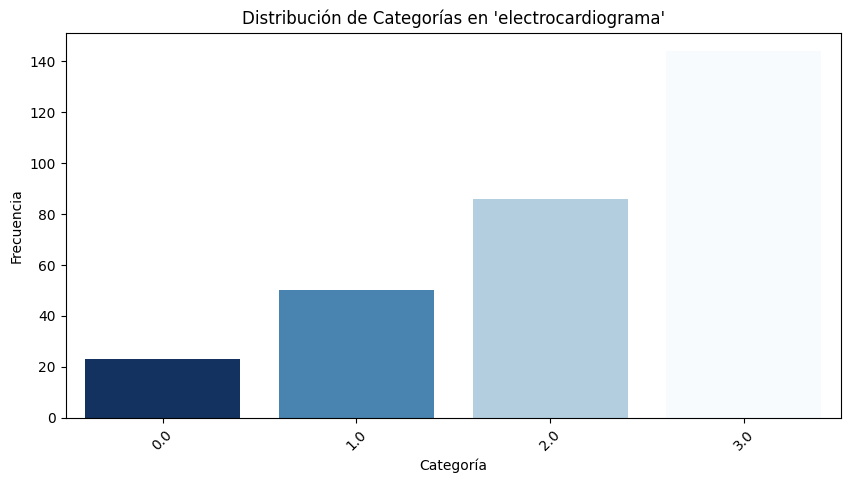

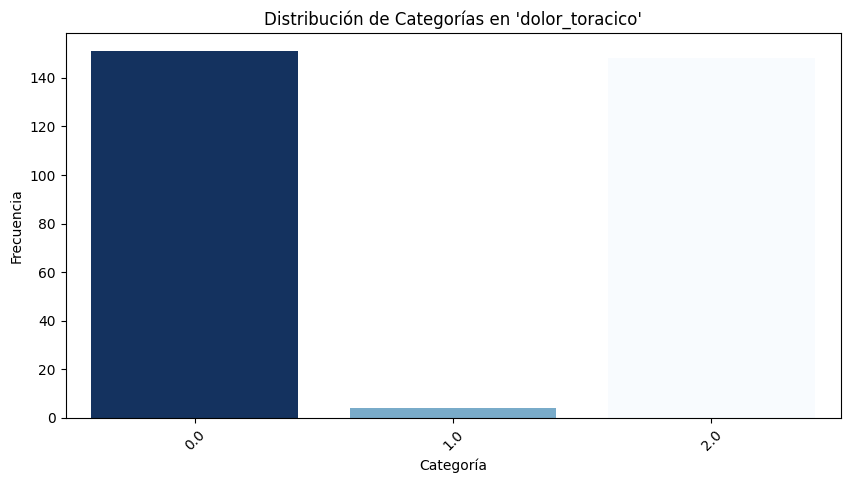

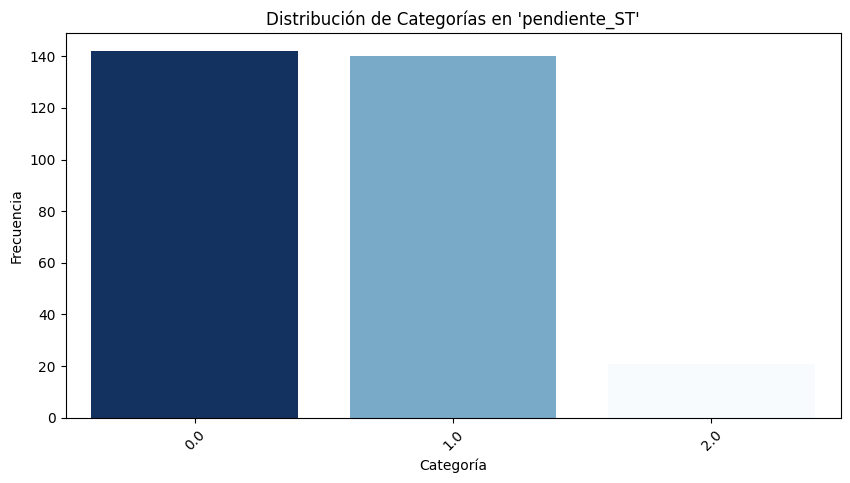

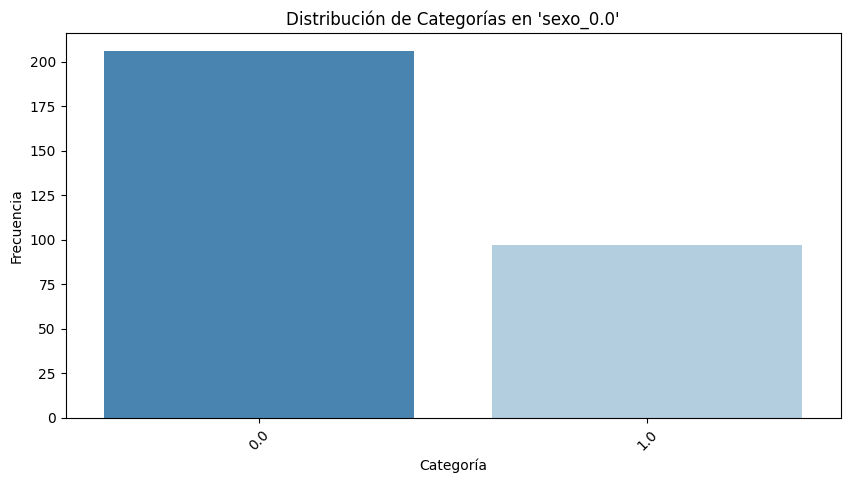

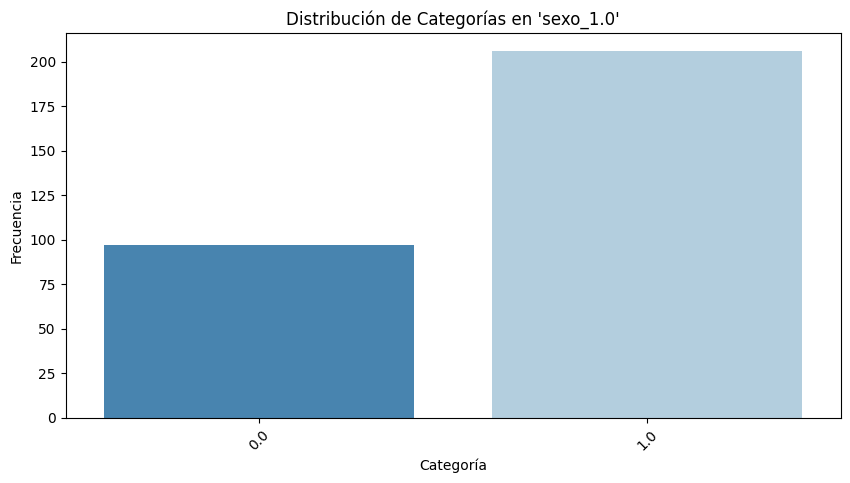

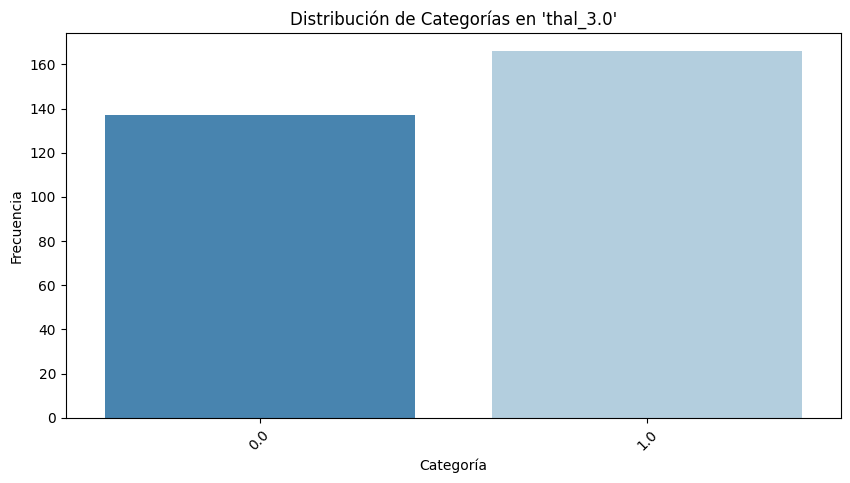

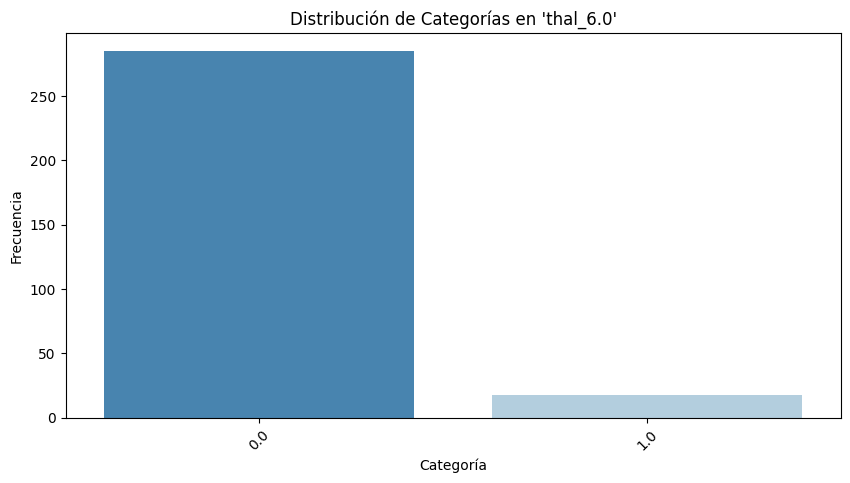

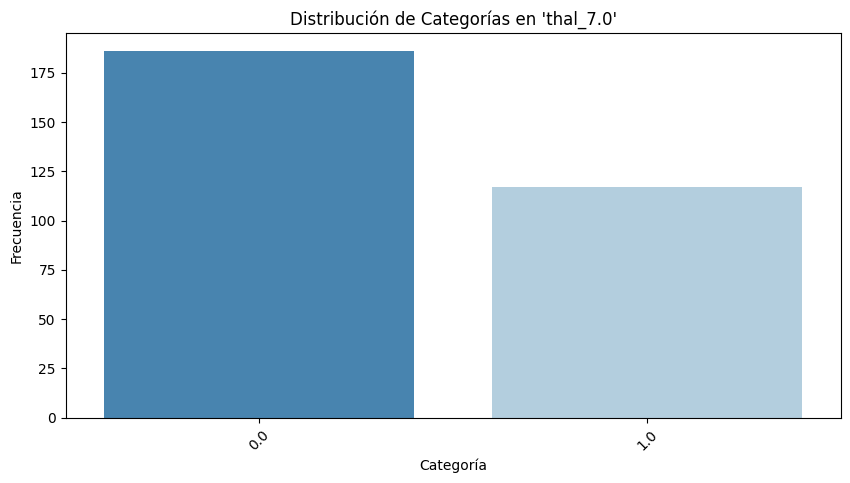

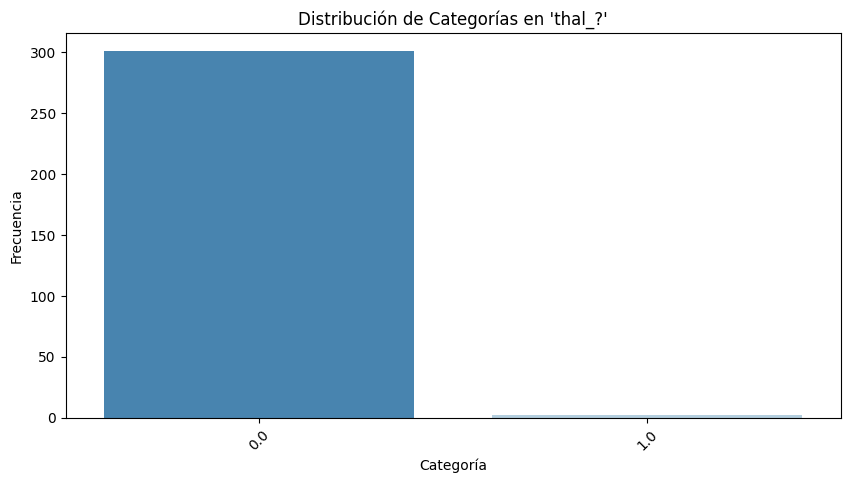

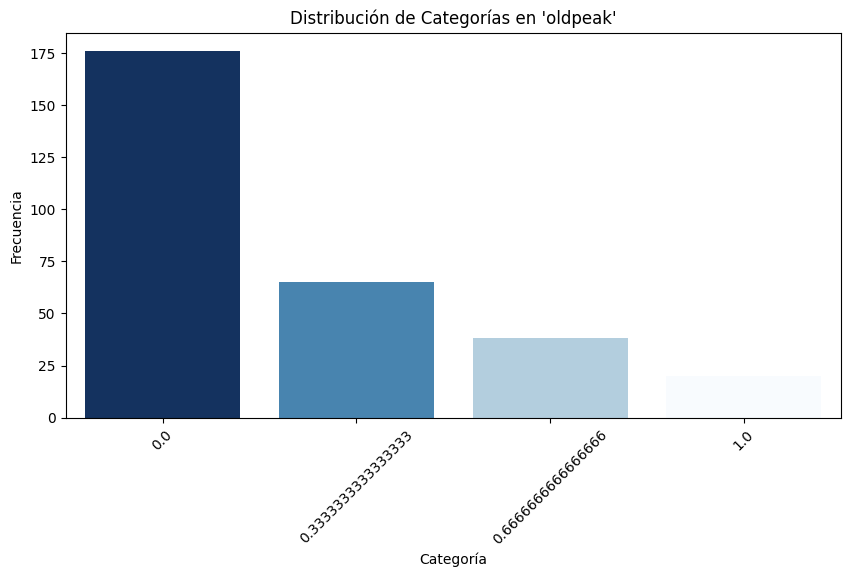

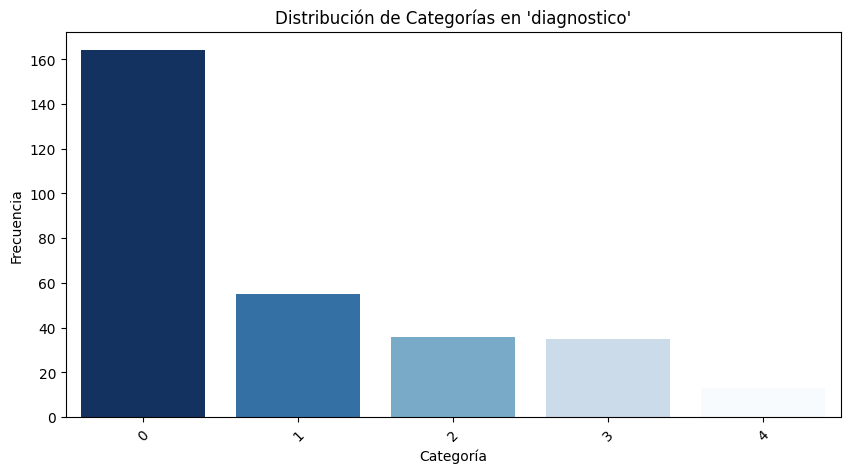

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
dataframe = pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")

# Identificar columnas categ√≥ricas
umbral_categorico = 10  # Ajusta seg√∫n tu dataset
columnas_categoricas = [col for col in dataframe.columns if dataframe[col].nunique() <= umbral_categorico]

# Crear gr√°ficos de frecuencia para cada columna categ√≥rica
for columna in columnas_categoricas:
    plt.figure(figsize=(10, 5))
    sns.barplot(
    x=dataframe[columna].value_counts().index,
    y=dataframe[columna].value_counts().values,
    hue=dataframe[columna].value_counts().index,  # Se asigna `hue`
    palette="Blues_r",
    legend=False  # Se desactiva la leyenda para evitar conflictos
)
    
    plt.title(f"Distribuci√≥n de Categor√≠as en '{columna}'")
    plt.xlabel("Categor√≠a")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()

# Transformaci√≥n de Variables Categ√≥ricas en el Dataset Heart Disease

En el dataset de Heart Disease, existen varias variables categ√≥ricas nominales que deben transformarse en variables binarias para su uso en modelos de aprendizaje autom√°tico. La transformaci√≥n sigue un proceso similar al ejemplo que mencionaste, adaptado a las caracter√≠sticas de este dataset.

## Variables Categ√≥ricas Nominales

Las variables categ√≥ricas nominales que requieren transformaci√≥n son:

- **sexo** ‚Üí Tiene 2 categor√≠as (0 = femenino, 1 = masculino), lo que dar√° lugar a 1 variable binaria tras la codificaci√≥n.
- **thal** ‚Üí Tiene 3 categor√≠as (3 = normal, 6 = defecto fijo, 7 = defecto reversible), lo que generar√° 3 variables binarias tras la transformaci√≥n.

## Proceso de Transformaci√≥n

Cada categor√≠a √∫nica de las variables categ√≥ricas se convertir√° en una columna binaria (0 o 1) mediante *one-hot encoding*.

### Ejemplo para `thal`:
- `thal_3` ‚Üí Indica si el paciente tiene un resultado "normal".
- `thal_6` ‚Üí Indica si el paciente tiene un "defecto fijo".
- `thal_7` ‚Üí Indica si el paciente tiene un "defecto reversible".

### Ejemplo para `sexo`:
- `sexo_1` ‚Üí Indica si el paciente es masculino.

## Cantidad de Variables Binarias Generadas

- Para `sexo`: 1 variable binaria.
- Para `thal`: 3 variables binarias.
- **Total de variables binarias generadas: 4.**

## C√°lculo de la Transformaci√≥n

- Variables originales: 13 (sin contar la columna objetivo `diagnostico`).
- Variables categ√≥ricas eliminadas: 2 (`sexo`, `thal`).
- Variables binarias agregadas: 4 (`sexo_1`, `thal_3`, `thal_6`, `thal_7`).

**Resultado final:**  
`13 - 2 + 4 = 15` variables finales despu√©s de la transformaci√≥n.

Luego de la transformaci√≥n, el dataframe tendr√° 15 variables, preparadas para ser utilizadas en modelos de aprendizaje autom√°tico.


<div id="dise√±o-transformadores" style="color:#106ba3"><h3>Dise√±o de transformadores</h3> </div>

Por medio de un Pipeline creamos un estimador compuesto. Esta herramienta nos permite combinar preprocesadores y transformadores para llevar un orden y estructura en el proceso de transformaci√≥n de variables. Para una mejor organizaci√≥n creamos los preprocesadores y sus m√©todos de transformaci√≥n.

In [ ]:
#Definici√≥n de transformadores (preprocesadores)

#1. Preprocesador de variables categ√≥ricas a num√©ricas (ordinales y nominales)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])
categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, handle_unknown = "ignore"))])# se ignorar√° una categor√≠a desconocida
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)

#2. Normalizaci√≥n y Scaling: Preprocesador de variables num√©ricas con transformaci√≥n MinMaxScaler
minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))])
preprocesorMinMax = ColumnTransformer(transformers =[
    ('tranminmax', minmax_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#3. Estandarizaci√≥n: Preprocesador de variables num√©ricas con transformaci√≥n StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])
preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#4. Preprocesador de variables num√©ricas con transformaci√≥n SimpleImputer
simpleimputer_transformer = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='median')) #otras: strategy='constant', strategy='most_frequent'
])
preprocesorSimpleImputer = ColumnTransformer(transformers =[
('transimpleimputer', simpleimputer_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

<div id="dise√±o-pipeline" style="color:#106ba3"><h3>Dise√±o de pipeline</h3> </div>

El procesador 'prepcn' es indispensable que se aplique antes de los dem√°s preprocesadores num√©ricos. En el Pipeline "pipe" se aplica primeramente la tansformaci√≥n de variables categ√≥ricas a variables num√©ricas y en segundo lugar se aplica la transformaci√≥n num√©rica. 

In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Definici√≥n del transformador para columnas categ√≥ricas ordinales
ordinal_encoder = OrdinalEncoder()

# Definici√≥n del transformador para columnas categ√≥ricas nominales
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')

# Definici√≥n del transformador para columnas num√©ricas (por ejemplo, MinMaxScaler)
min_max_scaler = MinMaxScaler()

# Crear el ColumnTransformer
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('ord', ordinal_encoder, categorical_ordinal_features),
        ('nom', one_hot_encoder, categorical_nominal_features),
        ('num', min_max_scaler, numeric_features)
    ]
)


In [51]:
from sklearn.neural_network import MLPClassifier
RedNeuronal = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)


In [52]:
from sklearn.pipeline import Pipeline

# Construcci√≥n de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres)
])

pipeRedNeuronal = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres),
    ('RN', RedNeuronal)
])


<div id="transformacion-variables" style="color:#106ba3"><h3>Transformaci√≥n de variables</h3> </div>

In [53]:
import copy
import pandas as pd

# Copiar el dataframe original antes de la transformaci√≥n
dataframeTransformado = copy.deepcopy(dataframe)

# Filtrar el dataframe para asegurarnos de que solo tenga las columnas esperadas por el pipeline
columnas_requeridas = set(categorical_ordinal_features + categorical_nominal_features + numeric_features)
columnas_existentes = list(columnas_requeridas & set(dataframeTransformado.columns))
dataframeTransformado = dataframeTransformado[columnas_existentes]

print(" Dataframe filtrado correctamente con las columnas esperadas.")
print(" Columnas finales antes de fit_transform():")
print(dataframeTransformado.columns)

# Asegurar que todas las columnas num√©ricas sean realmente num√©ricas antes de aplicar fit_transform()
for col in numeric_features:
    if col in dataframeTransformado.columns:
        dataframeTransformado[col] = pd.to_numeric(dataframeTransformado[col], errors='coerce')

print("Conversi√≥n de datos num√©ricos realizada.")

# Aplicar transformaci√≥n del pipeline
X_Transformado = pipe.fit_transform(dataframeTransformado)

print("Pipeline aplicado correctamente.")

# Obtener los nombres de las nuevas columnas
cnamesDataset1 = []

# Agregar nombres de variables ordinales categ√≥ricas
if len(categorical_ordinal_features) != 0:
    cnamesDataset1.extend(list(set(categorical_ordinal_features) & set(dataframeTransformado.columns)))

# Agregar nombres de variables nominales categ√≥ricas transformadas con OneHotEncoder
if len(categorical_nominal_features) != 0:
    # Obtener el objeto OneHotEncoder directamente
    onehot_encoder = pipe.named_steps['prepcn'].transformers_[1][1]

    # Obtener nombres de las columnas desde OneHotEncoder sin especificar las caracter√≠sticas manualmente
    cnamesDataset2 = onehot_encoder.get_feature_names_out()

    # Agregar nombres de variables transformadas
    cnamesDataset1.extend(cnamesDataset2)

# Agregar nombres de variables num√©ricas
cnamesDataset1.extend(list(set(numeric_features) & set(dataframeTransformado.columns)))

print("Lista de variables generadas correctamente:")
print(cnamesDataset1)

# Convertir X_Transformado nuevamente en un DataFrame con los nombres correctos
dataframeTransformado = pd.DataFrame(data=X_Transformado, columns=cnamesDataset1)

# Guardar el dataset sin etiquetas como CSV
dataframeTransformado.to_csv("DatasetTransformadoSinEtiquetas.csv", sep=";", index=False)
print(" Dataset sin etiquetas guardado correctamente.")

# Agregar la variable de salida (etiquetas) al final
dataframeTransformado = pd.concat([dataframeTransformado, Y], axis=1)

# Guardar el dataset con etiquetas como CSV
dataframeTransformado.to_csv("DatasetTransformadoConEtiquetas.csv", sep=";", index=False)
print(" Dataset con etiquetas guardado correctamente.")

# Mostrar las primeras filas del dataframe
print(" Primeras filas del DataFrame despu√©s de la transformaci√≥n:")
print(dataframeTransformado.head())

 Dataframe filtrado correctamente con las columnas esperadas.
 Columnas finales antes de fit_transform():
Index(['electrocardiograma', 'dolor_toracico', 'frecuencia_cardiaca_maxima',
       'pendiente_ST', 'cantidad_vasos', 'sexo', 'presion_arterial', 'thal',
       'colesterol', 'edad', 'oldpeak'],
      dtype='object')
Conversi√≥n de datos num√©ricos realizada.
Pipeline aplicado correctamente.
Lista de variables generadas correctamente:
['electrocardiograma', 'dolor_toracico', 'pendiente_ST', 'sexo_0.0', 'sexo_1.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'thal_?', 'frecuencia_cardiaca_maxima', 'cantidad_vasos', 'presion_arterial', 'colesterol', 'edad', 'oldpeak']
 Dataset sin etiquetas guardado correctamente.
 Dataset con etiquetas guardado correctamente.
 Primeras filas del DataFrame despu√©s de la transformaci√≥n:
   electrocardiograma  dolor_toracico  pendiente_ST  sexo_0.0  sexo_1.0  \
0                 0.0             2.0           2.0       0.0       1.0   
1                 3.0  

In [54]:
import pickle
from sklearn import set_config

# Funci√≥n para guardar un Pipeline o Modelo
def guardarPipeline(pipeline, nombreArchivo):
    with open(nombreArchivo + '.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print(f" Pipeline guardado correctamente en {nombreArchivo}.pickle")

# Funci√≥n para cargar un Pipeline o Modelo
def cargarPipeline(nombreArchivo):
    try:
        with open(nombreArchivo + '.pickle', 'rb') as handle:
            pipeline = pickle.load(handle)
        print(f" Pipeline cargado correctamente desde {nombreArchivo}.pickle")
        return pipeline
    except FileNotFoundError:
        print(f" Error: Archivo {nombreArchivo}.pickle no encontrado.")
        return None
    except Exception as e:
        print(f" Error al cargar el pipeline: {e}")
        return None

# Guardar el pipeline actual
guardarPipeline(pipe, 'pipePreprocesadores')

# Limpiar la variable antes de cargar
pipe = None  

# Cargar el pipeline guardado
pipe = cargarPipeline('pipePreprocesadores')

# Configuraci√≥n para visualizar el pipeline
set_config(display='diagram')
pipe

 Pipeline guardado correctamente en pipePreprocesadores.pickle
 Pipeline cargado correctamente desde pipePreprocesadores.pickle


Pipeline(steps=[('prepcn',
                 ColumnTransformer(transformers=[('ord', OrdinalEncoder(),
                                                  ['dolor_toracico',
                                                   'electrocardiograma',
                                                   'pendiente_ST']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sexo', 'thal']),
                                                 ('num', MinMaxScaler(),
                                                  ['edad', 'colesterol',
                                                   'presion_arterial',
                                                   'frecuencia_cardiaca_maxima',
                                                   'oldpeak',
                                                   'cantidad_vasos'])]))])

<div id="analisis-correlacion" style="color:#106ba3"><h3>An√°lisis de correlaci√≥n</h3> </div>

En esta subsecci√≥n se realiza un mapa de calor de las correlaciones entre todas las variables para identificar las variables m√°s relevantes e influyentes a la variable de salida.

In [55]:
dfCorrel=copy.deepcopy(dataframeTransformado)
dfCorrel=dfCorrel.corr()
dfCorrel.head()

electrocardiograma  dolor_toracico  pendiente_ST  \
electrocardiograma            1.000000        0.067505      0.152050   
dolor_toracico                0.067505        1.000000      0.133946   
pendiente_ST                  0.152050        0.133946      1.000000   
sexo_0.0                     -0.010084       -0.021647     -0.037533   
sexo_1.0                      0.010084        0.021647      0.037533   

                    sexo_0.0  sexo_1.0  thal_3.0  thal_6.0  thal_7.0  \
electrocardiograma -0.010084  0.010084 -0.264936  0.045860  0.243738   
dolor_toracico     -0.021647  0.021647 -0.029082  0.044672  0.007905   
pendiente_ST       -0.037533  0.037533 -0.298671  0.185825  0.217318   
sexo_0.0            1.000000 -1.000000  0.381754 -0.142524 -0.326284   
sexo_1.0           -1.000000  1.000000 -0.381754  0.142524  0.326284   

                      thal_?  frecuencia_cardiaca_maxima  cantidad_vasos  \
electrocardiograma  0.029048                    0.104139        0.072319   
dolor_toracico      0.000812                    0.148868        0.171043   
pendiente_ST       -0.013337                    0.161770       -0.004062   
sexo_0.0            0.031427                    0.097542        0.199915   
sexo_1.0           -0.031427                   -0.097542       -0.199915   

                    presion_arterial  colesterol      edad   oldpeak  \
electrocardiograma         -0.036077   -0.334422  0.202277  0.233214   
dolor_toracico              0.146560   -0.083389  0.114133  0.128343   
pendiente_ST                0.117382   -0.385601  0.577537  0.110119   
sexo_0.0                    0.064456    0.048663 -0.102173 -0.093185   
sexo_1.0                   -0.064456   -0.048663  0.102173  0.093185   

                    diagnostico  
electrocardiograma     0.407075  
dolor_toracico         0.183696  
pendiente_ST           0.377957  
sexo_0.0              -0.224469  
sexo_1.0               0.224469

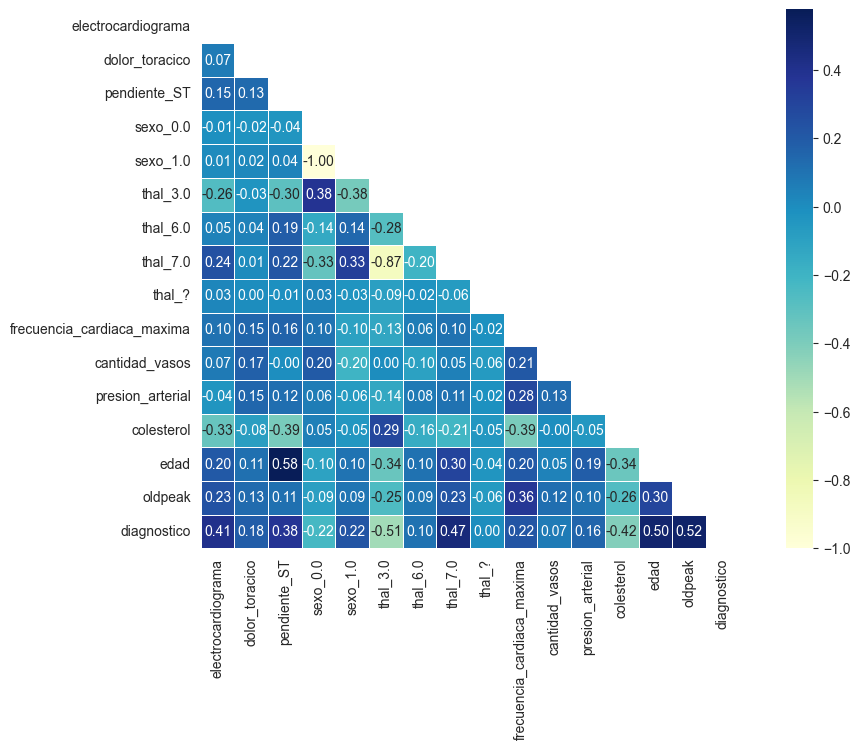

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlaci√≥n del dataset
dfCorrel = dataframeTransformado.corr()

# Crear una m√°scara para ocultar la parte superior de la matriz
mask = np.zeros_like(dfCorrel)
mask[np.triu_indices_from(mask)] = True

# Configuraci√≥n de visualizaci√≥n
plt.figure(figsize=(12, 7))
sns.set_style("white")

# Generar el mapa de calor de las correlaciones
ax = sns.heatmap(dfCorrel, mask=mask, cmap="YlGnBu", annot=True, fmt=".2f", square=True, linewidths=0.5)

# Guardar la imagen
plt.savefig('attribute_correlations.png', dpi=300)
plt.show()

In [58]:
# Ordenar las correlaciones en relaci√≥n con la variable de salida
dfCorrOrdenado = dfCorrel.sort_values(by=['diagnostico'], ascending=False)

# Mostrar las 10 variables con mayor correlaci√≥n positiva con la variable objetivo
dfCorrOrdenado['diagnostico'].head(10)

diagnostico                   1.000000
oldpeak                       0.518909
edad                          0.504092
thal_7.0                      0.466119
electrocardiograma            0.407075
pendiente_ST                  0.377957
sexo_1.0                      0.224469
frecuencia_cardiaca_maxima    0.222853
dolor_toracico                0.183696
presion_arterial              0.157754
Name: diagnostico, dtype: float64

In [59]:
# Ordenar las correlaciones en relaci√≥n con la variable de salida (de menor a mayor)
dfCorrOrdenado = dfCorrel.sort_values(by=['diagnostico'], ascending=True)

# Mostrar las 10 variables con mayor correlaci√≥n negativa con el diagn√≥stico
dfCorrOrdenado['diagnostico'].head(10)

thal_3.0                     -0.505998
colesterol                   -0.415040
sexo_0.0                     -0.224469
thal_?                        0.004167
cantidad_vasos                0.070909
thal_6.0                      0.103916
presion_arterial              0.157754
dolor_toracico                0.183696
frecuencia_cardiaca_maxima    0.222853
sexo_1.0                      0.224469
Name: diagnostico, dtype: float64

<div id="seleccion-extraccion-variables" style="color:#106ba3"><h3>Selecci√≥n y extracci√≥n de variables</h3> </div>

Se seleccionan las variables con mayor correlaci√≥n. Tambi√©n se podr√≠a omitir este paso y continuar con todas las variables.

In [60]:
# Mostrar todas las columnas disponibles en dataframeTransformado
print("üîç Columnas disponibles en dataframeTransformado:")
print(dataframeTransformado.columns)

# Definir las variables transformadas con OneHotEncoder
sexo_encoded = [col for col in dataframeTransformado.columns if "sexo" in col]
thal_encoded = [col for col in dataframeTransformado.columns if "thal" in col]

# Extraer las variables relevantes del dataset transformado
columnas_extraccion = ['edad', 'dolor_toracico', 'presion_arterial', 
                        'colesterol', 'frecuencia_cardiaca_maxima', 'oldpeak', 
                        'pendiente_ST', 'cantidad_vasos', 'diagnostico']

# Agregar las versiones transformadas de `sexo` y `thal`
columnas_extraccion.extend(sexo_encoded)
columnas_extraccion.extend(thal_encoded)

# Crear el nuevo dataframe con las variables corregidas
dataframeExtraccion = dataframeTransformado[columnas_extraccion]

# Mostrar la forma del dataset extra√≠do
print("Dimensiones del nuevo dataframe:", dataframeExtraccion.shape)

# Mostrar las primeras filas del nuevo dataframe
dataframeExtraccion.head()

üîç Columnas disponibles en dataframeTransformado:
Index(['electrocardiograma', 'dolor_toracico', 'pendiente_ST', 'sexo_0.0',
       'sexo_1.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'thal_?',
       'frecuencia_cardiaca_maxima', 'cantidad_vasos', 'presion_arterial',
       'colesterol', 'edad', 'oldpeak', 'diagnostico'],
      dtype='object')
Dimensiones del nuevo dataframe: (303, 15)


edad  dolor_toracico  presion_arterial  colesterol  \
0  0.370968             2.0          0.481132    0.603053   
1  0.241935             2.0          0.622642    0.282443   
2  0.419355             2.0          0.245283    0.442748   
3  0.564516             0.0          0.339623    0.885496   
4  0.225806             2.0          0.339623    0.770992   

   frecuencia_cardiaca_maxima   oldpeak  pendiente_ST  cantidad_vasos  \
0                    0.708333  0.000000           2.0        0.244292   
1                    0.791667  1.000000           1.0        0.365297   
2                    0.791667  0.666667           1.0        0.235160   
3                    0.166667  0.000000           2.0        0.283105   
4                    0.250000  0.000000           0.0        0.178082   

   diagnostico  sexo_0.0  sexo_1.0  thal_3.0  thal_6.0  thal_7.0  thal_?  
0            0       0.0       1.0       0.0       1.0       0.0     0.0  
1            2       0.0       1.0       1.0       0.0       0.0     0.0  
2            1       0.0       1.0       0.0       0.0       1.0     0.0  
3            0       0.0       1.0       1.0       0.0       0.0     0.0  
4            0       1.0       0.0       1.0       0.0       0.0     0.0

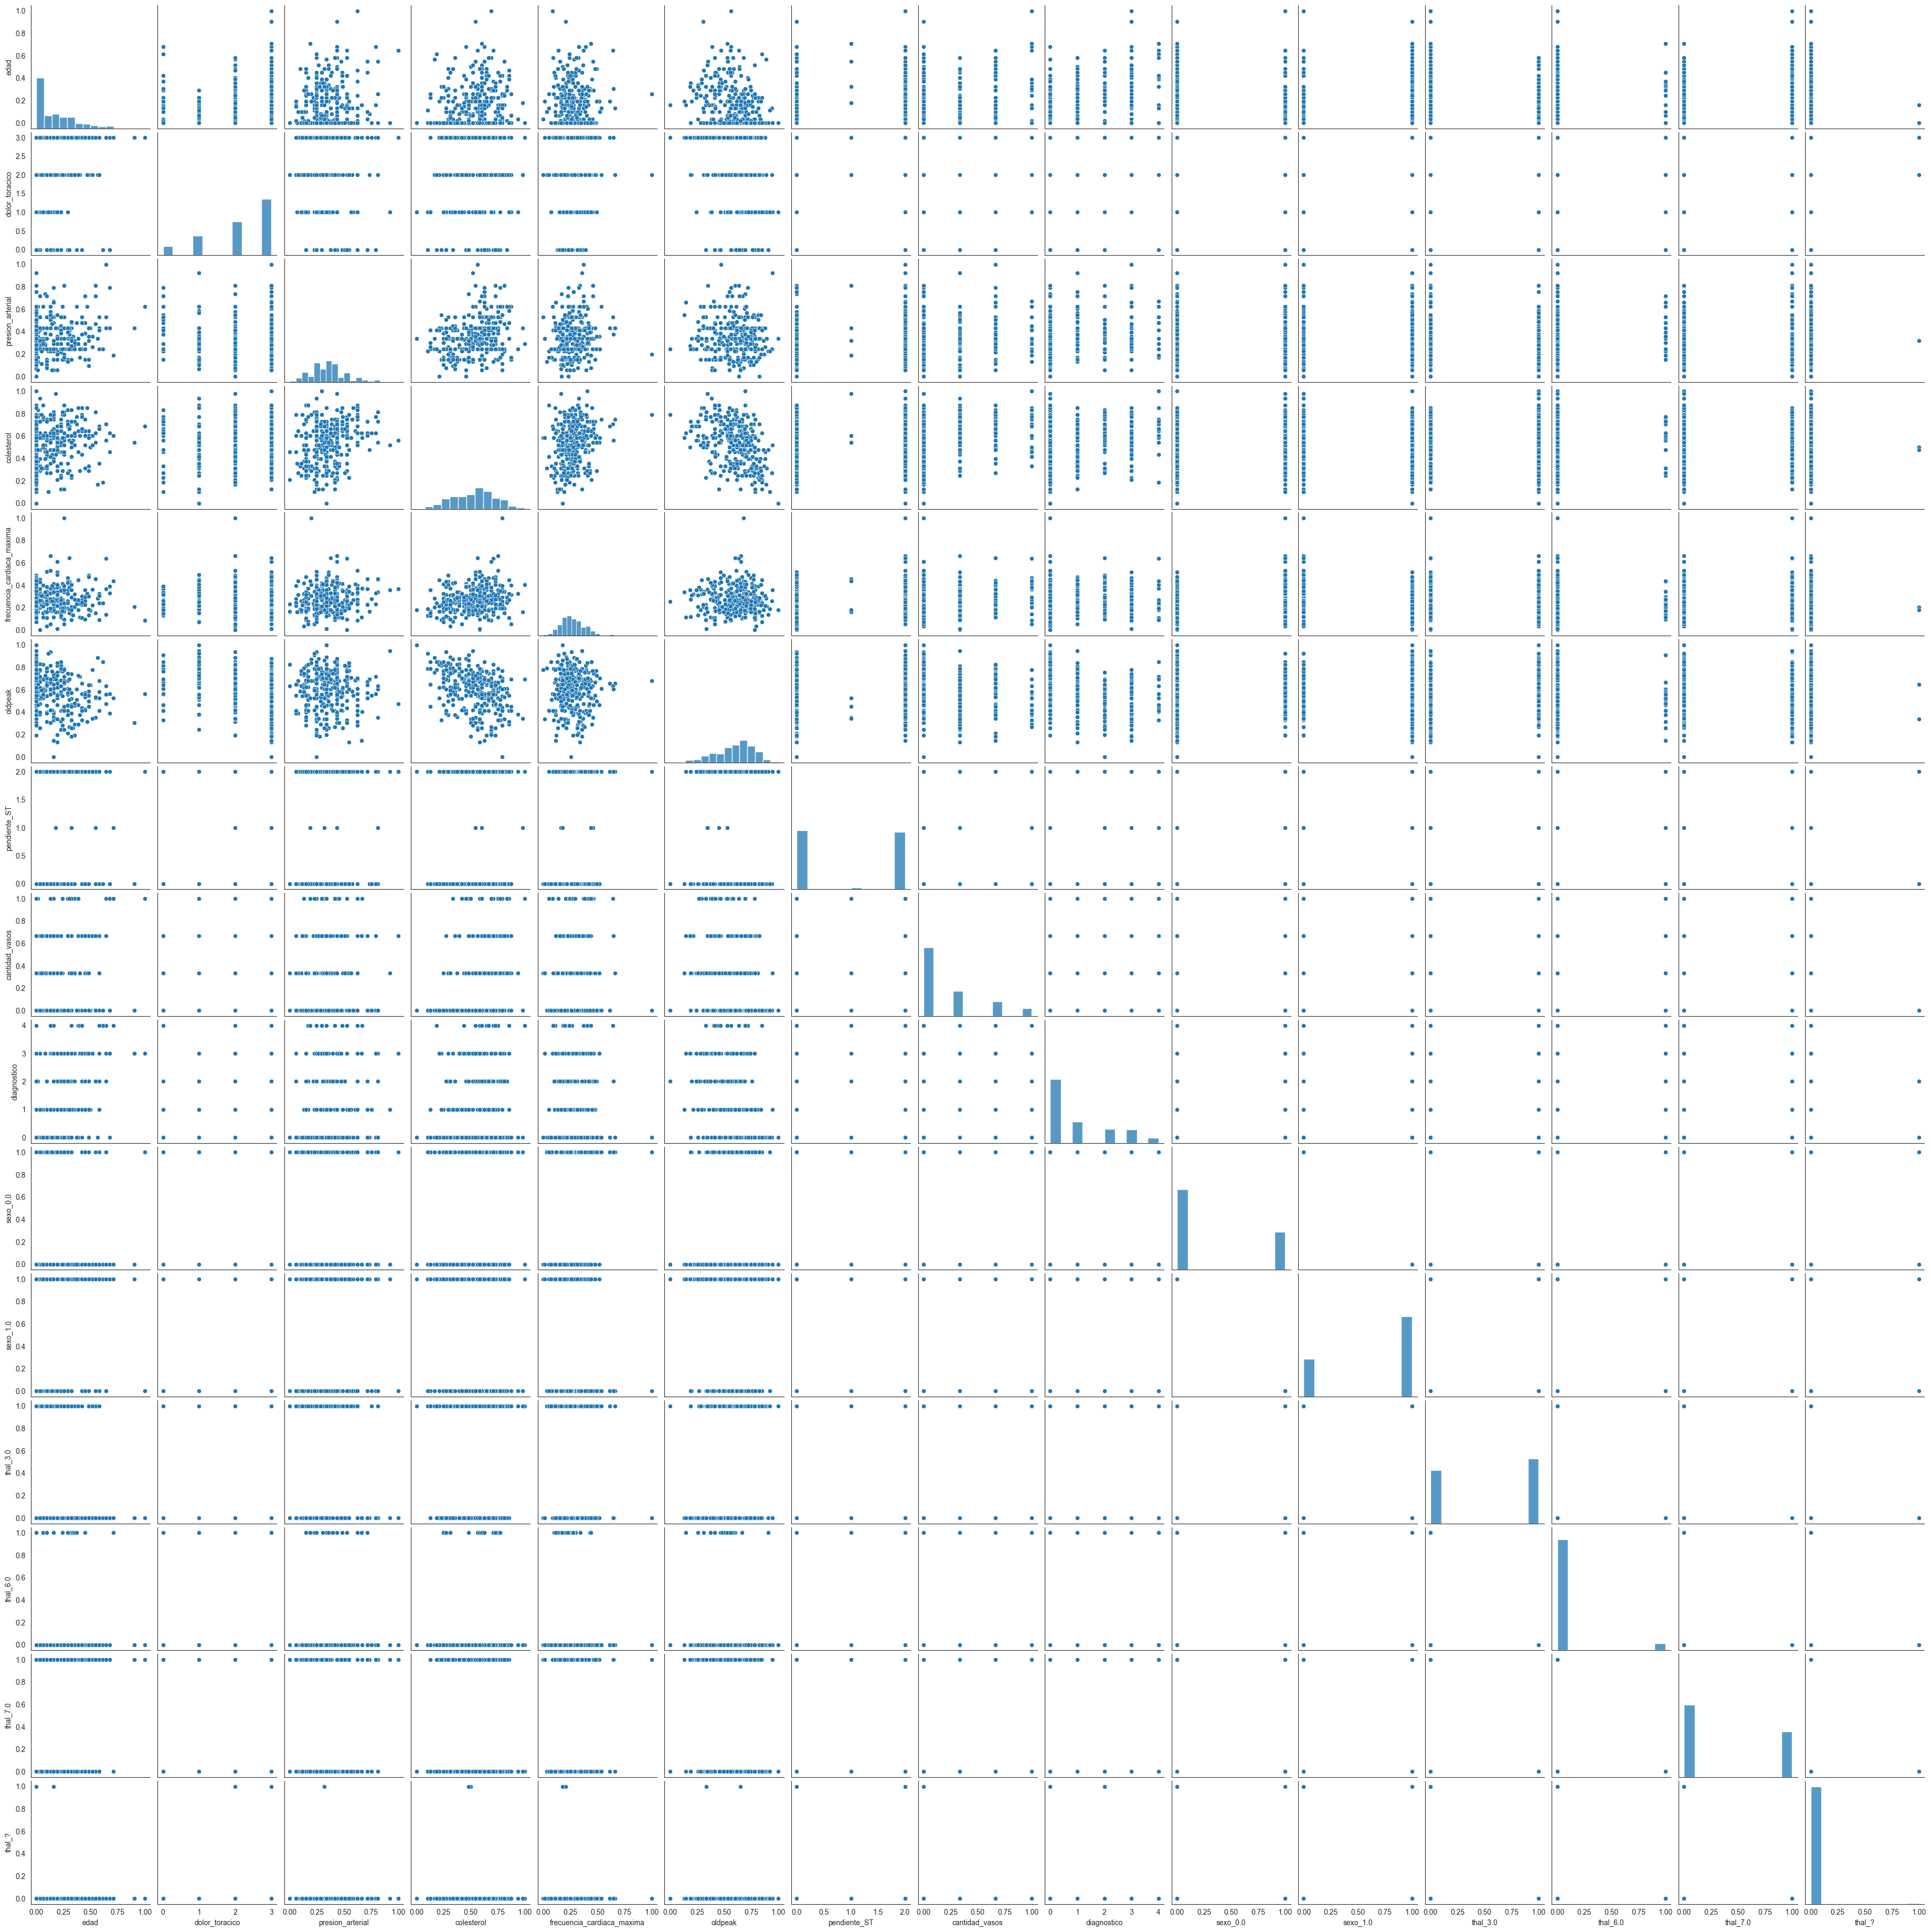

In [29]:
#Generar todas las figuras de correlaciones entre cada par de variables
sns.pairplot(dataframeExtraccion)
plt.show()

<div id="transformacion-numerica-adicional" style="color:#106ba3"><h3>Transformaci√≥n num√©rica adicional: Min max scaling</h3> </div>

In [62]:
# Verificar todas las columnas disponibles en dataframeTransformado
print("üîç Columnas en dataframeTransformado:")
print(dataframeTransformado.columns)

# Asegurar que 'diagnostico' existe y agregarlo a dataframeExtraccion
if 'diagnostico' in dataframeTransformado.columns:
    dataframeExtraccion['diagnostico'] = dataframeTransformado['diagnostico']
    print("'diagnostico' agregado correctamente a dataframeExtraccion.")
else:
    print("Error: 'diagnostico' no est√° en dataframeTransformado. Verifica el nombre correcto.")

# Mostrar la forma actualizada de dataframeExtraccion
print(" Dimensiones del dataframeExtraccion actualizado:", dataframeExtraccion.shape)

# Mostrar las primeras filas para verificar
dataframeExtraccion.head()

üîç Columnas en dataframeTransformado:
Index(['electrocardiograma', 'dolor_toracico', 'pendiente_ST', 'sexo_0.0',
       'sexo_1.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'thal_?',
       'frecuencia_cardiaca_maxima', 'cantidad_vasos', 'presion_arterial',
       'colesterol', 'edad', 'oldpeak', 'diagnostico'],
      dtype='object')
'diagnostico' agregado correctamente a dataframeExtraccion.
 Dimensiones del dataframeExtraccion actualizado: (303, 15)


C:\Users\mlata\AppData\Local\Temp\ipykernel_26236\1095670375.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframeExtraccion['diagnostico'] = dataframeTransformado['diagnostico']


edad  dolor_toracico  presion_arterial  colesterol  \
0  0.370968             2.0          0.481132    0.603053   
1  0.241935             2.0          0.622642    0.282443   
2  0.419355             2.0          0.245283    0.442748   
3  0.564516             0.0          0.339623    0.885496   
4  0.225806             2.0          0.339623    0.770992   

   frecuencia_cardiaca_maxima   oldpeak  pendiente_ST  cantidad_vasos  \
0                    0.708333  0.000000           2.0        0.244292   
1                    0.791667  1.000000           1.0        0.365297   
2                    0.791667  0.666667           1.0        0.235160   
3                    0.166667  0.000000           2.0        0.283105   
4                    0.250000  0.000000           0.0        0.178082   

   diagnostico  sexo_0.0  sexo_1.0  thal_3.0  thal_6.0  thal_7.0  thal_?  
0            0       0.0       1.0       0.0       1.0       0.0     0.0  
1            2       0.0       1.0       1.0       0.0       0.0     0.0  
2            1       0.0       1.0       0.0       0.0       1.0     0.0  
3            0       0.0       1.0       1.0       0.0       0.0     0.0  
4            0       1.0       0.0       1.0       0.0       0.0     0.0

In [63]:
from sklearn import preprocessing
dataframeExtraccion = dataframeExtraccion.drop(['diagnostico'], axis=1)


data_scaler_minmax = preprocessing.MinMaxScaler(feature_range=(0, 1))
data_scaled_minmax = data_scaler_minmax.fit_transform(dataframeExtraccion)
print("\n Datos normalizados con escala Min Max:\n")
DataframeTransformado1 = pd.DataFrame(data=data_scaled_minmax, columns=dataframeExtraccion.columns)
DataframeTransformado1 = pd.concat([DataframeTransformado1, dataframeTransformado[['diagnostico']]], axis=1)
DataframeTransformado1.to_csv("DatasetHeartDiseaseTransformadoMinMax.csv", sep=";", index=False)
DataframeTransformado1.head()


 Datos normalizados con escala Min Max:



edad  dolor_toracico  presion_arterial  colesterol  \
0  0.370968             1.0          0.481132    0.603053   
1  0.241935             1.0          0.622642    0.282443   
2  0.419355             1.0          0.245283    0.442748   
3  0.564516             0.0          0.339623    0.885496   
4  0.225806             1.0          0.339623    0.770992   

   frecuencia_cardiaca_maxima   oldpeak  pendiente_ST  cantidad_vasos  \
0                    0.708333  0.000000           1.0        0.244292   
1                    0.791667  1.000000           0.5        0.365297   
2                    0.791667  0.666667           0.5        0.235160   
3                    0.166667  0.000000           1.0        0.283105   
4                    0.250000  0.000000           0.0        0.178082   

   sexo_0.0  sexo_1.0  thal_3.0  thal_6.0  thal_7.0  thal_?  diagnostico  
0       0.0       1.0       0.0       1.0       0.0     0.0            0  
1       0.0       1.0       1.0       0.0       0.0     0.0            2  
2       0.0       1.0       0.0       0.0       1.0     0.0            1  
3       0.0       1.0       1.0       0.0       0.0     0.0            0  
4       1.0       0.0       1.0       0.0       0.0     0.0            0

<div style="color:#106ba3"><h3>Transformaci√≥n num√©rica adicional: Normalizaci√≥n L1 y L2</h3> </div>

In [64]:
# Manejo de valores NaN antes de la normalizaci√≥n
dataframeExtraccion = dataframeExtraccion.fillna(0)  # Reemplaza NaN con 0
# Alternativa: dataframeExtraccion = dataframeExtraccion.dropna()  # Elimina filas con NaN

# Aplicar normalizaci√≥n L1 y L2 despu√©s de asegurarse que no hay valores NaN
data_normalized_l1 = preprocessing.normalize(dataframeExtraccion, norm='l1')
data_normalized_l2 = preprocessing.normalize(dataframeExtraccion, norm='l2')

print("\n Datos normalizados con L1 y L2 sin NaN:\n")


 Datos normalizados con L1 y L2 sin NaN:



In [65]:
from sklearn import preprocessing
import pandas as pd

# Verificar que 'diagnostico' est√° en dataframeTransformado y agregarlo a dataframeExtraccion si falta
if 'diagnostico' not in dataframeExtraccion.columns:
    dataframeExtraccion['diagnostico'] = dataframeTransformado['diagnostico']
    print(" 'diagnostico' agregado correctamente a dataframeExtraccion.")

# Separar la variable objetivo antes de la normalizaci√≥n
diagnostico_column = dataframeExtraccion[['diagnostico']]
dataframeExtraccion = dataframeExtraccion.drop(['diagnostico'], axis=1)

# Normalizaci√≥n L1: la suma de los valores absolutos es igual a 1
data_normalized_l1 = preprocessing.normalize(dataframeExtraccion, norm='l1')

# Normalizaci√≥n L2: la suma de los cuadrados es igual a 1
data_normalized_l2 = preprocessing.normalize(dataframeExtraccion, norm='l2')

print("\n Datos normalizados con L1 y L2:\n")

# Crear DataFrame con datos normalizados L1
DataframeTransformado2 = pd.DataFrame(data=data_normalized_l1, columns=dataframeExtraccion.columns)

# Agregar la variable objetivo nuevamente
DataframeTransformado2 = pd.concat([DataframeTransformado2, diagnostico_column], axis=1)

# Guardar el dataset con normalizaci√≥n L1
DataframeTransformado2.to_csv("DatasetHeartDiseaseTransformadoNormL1.csv", sep=";", index=False)
print(" Dataset con normalizaci√≥n L1 guardado correctamente.")

# Mostrar las primeras filas del dataset transformado con L1
print(DataframeTransformado2.head())

# Crear DataFrame con datos normalizados L2
DataframeTransformado3 = pd.DataFrame(data=data_normalized_l2, columns=dataframeExtraccion.columns)

# Agregar la variable objetivo nuevamente
DataframeTransformado3 = pd.concat([DataframeTransformado3, diagnostico_column], axis=1)

# Guardar el dataset con normalizaci√≥n L2
DataframeTransformado3.to_csv("DatasetHeartDiseaseTransformadoNormL2.csv", sep=";", index=False)
print(" Dataset con normalizaci√≥n L2 guardado correctamente.")

# Mostrar las primeras filas del dataset transformado con L2
print(DataframeTransformado3.head())

 'diagnostico' agregado correctamente a dataframeExtraccion.

 Datos normalizados con L1 y L2:

 Dataset con normalizaci√≥n L1 guardado correctamente.
       edad  dolor_toracico  presion_arterial  colesterol  \
0  0.044122        0.237875          0.057225    0.071726   
1  0.029135        0.240848          0.074981    0.034013   
2  0.053757        0.256381          0.031443    0.056756   
3  0.090476        0.000000          0.054432    0.141920   
4  0.039172        0.346951          0.058916    0.133748   

   frecuencia_cardiaca_maxima   oldpeak  pendiente_ST  cantidad_vasos  \
0                    0.084247  0.000000      0.237875        0.029056   
1                    0.095336  0.120424      0.120424        0.043991   
2                    0.101484  0.085460      0.128191        0.030145   
3                    0.026712  0.000000      0.320543        0.045374   
4                    0.043369  0.000000      0.000000        0.030893   

   sexo_0.0  sexo_1.0  thal_3.0  thal_6.0  

<div style="color:#106ba3"><h3>Transformaci√≥n num√©rica adicional: Estandarizaci√≥n</h3> </div>

In [66]:
from sklearn import preprocessing
import pandas as pd

# Verificar que 'diagnostico' est√° en dataframeTransformado y agregarlo a dataframeExtraccion si falta
if 'diagnostico' not in dataframeExtraccion.columns:
    dataframeExtraccion['diagnostico'] = dataframeTransformado['diagnostico']
    print(" 'diagnostico' agregado correctamente a dataframeExtraccion.")

# Separar la variable objetivo antes de la estandarizaci√≥n
diagnostico_column = dataframeExtraccion[['diagnostico']]
dataframeExtraccion = dataframeExtraccion.drop(['diagnostico'], axis=1)

# Aplicar estandarizaci√≥n con `scale()`
XEstandarizado = preprocessing.scale(dataframeExtraccion)

print("\n Datos estandarizados correctamente:\n")

# Crear DataFrame con datos estandarizados
DataframeTransformado4 = pd.DataFrame(data=XEstandarizado, columns=dataframeExtraccion.columns)

# Agregar la variable objetivo nuevamente
DataframeTransformado4 = pd.concat([DataframeTransformado4, diagnostico_column], axis=1)

# Guardar el dataset transformado en un archivo CSV
DataframeTransformado4.to_csv("DatasetHeartDiseaseTransformadoScale.csv", sep=";", index=False)
print(" Dataset con estandarizaci√≥n guardado correctamente.")

# Mostrar las primeras filas del dataset transformado
print(DataframeTransformado4.head())

 'diagnostico' agregado correctamente a dataframeExtraccion.

 Datos estandarizados correctamente:

 Dataset con estandarizaci√≥n guardado correctamente.
       edad  dolor_toracico  presion_arterial  colesterol  \
0  1.087338        1.016684          0.757525    0.017197   
1  0.397182        1.016684          1.611220   -1.821905   
2  1.346147        1.016684         -0.665300   -0.902354   
3  2.122573       -0.996749         -0.096170    1.637359   
4  0.310912        1.016684         -0.096170    0.980537   

   frecuencia_cardiaca_maxima   oldpeak  pendiente_ST  cantidad_vasos  \
0                    0.948726 -0.711131      2.274579       -0.264900   
1                    1.392002  2.504881      0.649113        0.760415   
2                    1.392002  1.432877      0.649113       -0.342283   
3                   -1.932564 -0.711131      2.274579        0.063974   
4                   -1.489288 -0.711131     -0.976352       -0.825922   

   sexo_0.0  sexo_1.0  thal_3.0  thal_6.

<div id="Transformacion-nuevos-samples" style="color:#106ba3"><h3>Transformaci√≥n de nuevos samples</h3> </div>

La siguiente funci√≥n permite transformar las variables de un nuevo cliente a un formato num√©rico. En la funci√≥n se define el valor por defecto de las variables, se crea el dataframe con los nuevos valores y los nombres de las variables. Luego, se aplica la transformaci√≥n de variables mediante el Pipeline. 

In [67]:
import pandas as pd

def preprocesarNuevoPaciente(edad=67, sexo=1, dolor_toracico=3, presion_arterial=130, colesterol=250, 
                             azucar_sangre=0, electrocardiograma=1, frecuencia_cardiaca_maxima=160, 
                             oldpeak=1.5, pendiente_ST=2, cantidad_vasos=1, thal=3):   

    # Convertir las variables categ√≥ricas a string
    sexo = str(sexo)
    thal = str(thal)

    # Nombres de columnas
    cnames = ['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol',
              'azucar_sangre', 'electrocardiograma', 'frecuencia_cardiaca_maxima',
              'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal']

    # Crear el DataFrame del nuevo paciente
    Xnew = [[edad, sexo, dolor_toracico, presion_arterial, colesterol, 
             azucar_sangre, electrocardiograma, frecuencia_cardiaca_maxima, 
             oldpeak, pendiente_ST, cantidad_vasos, thal]]

    Xnew_Dataframe = pd.DataFrame(data=Xnew, columns=cnames)

    # Mostrar la informaci√≥n antes de aplicar el pipeline
    print("\n DataFrame antes del preprocesamiento:\n")
    display(Xnew_Dataframe)  # Usa display() en Jupyter para forzar la salida

    # Transformar con el pipeline
    Xnew_Preprocesado = pipe.transform(Xnew_Dataframe)

    # Mostrar la informaci√≥n preprocesada
    print("\n Resultado preprocesado (array):\n", Xnew_Preprocesado)

    return Xnew_Preprocesado

# Aplicar la funci√≥n de preprocesamiento
Xnew_Preprocesado = preprocesarNuevoPaciente()


 DataFrame antes del preprocesamiento:



edad sexo  dolor_toracico  presion_arterial  colesterol  azucar_sangre  \
0    67    1               3               130         250              0   

   electrocardiograma  frecuencia_cardiaca_maxima  oldpeak  pendiente_ST  \
0                   1                         160      1.5             2   

   cantidad_vasos thal  
0               1    3


 Resultado preprocesado (array):
 [[2 1 1 0 0 0 0 0 0 1 0 0 1 0 0]]


<div id="clasificacion-knn" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 2: Clasificaci√≥n con el algoritmo KNN, evaluaci√≥n y optimizaci√≥n</h2> </div>

A partir de la carga del dataset transformado se proceder con la fase de clasificaci√≥n. Para ello, se debe indicar el csv deseado.

In [68]:
import pandas as pd

# Cargar el dataset transformado con etiquetas
dataframeTransformado = pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")

# Reemplazar valores en la variable objetivo
dataframeTransformado['diagnostico'] = dataframeTransformado['diagnostico'].replace(2, 0)

# Mostrar dimensiones del dataframe
print("\n Dimensiones del dataset transformado:", dataframeTransformado.shape)

# Mostrar las primeras filas del dataset
print("\n Primeras filas del dataset transformado:\n")
print(dataframeTransformado.head())


 Dimensiones del dataset transformado: (303, 16)

 Primeras filas del dataset transformado:

   electrocardiograma  dolor_toracico  pendiente_ST  sexo_0.0  sexo_1.0  \
0                 0.0             2.0           2.0       0.0       1.0   
1                 3.0             2.0           1.0       0.0       1.0   
2                 3.0             2.0           1.0       0.0       1.0   
3                 2.0             0.0           2.0       0.0       1.0   
4                 1.0             2.0           0.0       1.0       0.0   

   thal_3.0  thal_6.0  thal_7.0  thal_?  frecuencia_cardiaca_maxima  \
0       0.0       1.0       0.0     0.0                    0.708333   
1       1.0       0.0       0.0     0.0                    0.791667   
2       0.0       0.0       1.0     0.0                    0.791667   
3       1.0       0.0       0.0     0.0                    0.166667   
4       1.0       0.0       0.0     0.0                    0.250000   

   cantidad_vasos  presion_a

In [67]:
import pickle
import pandas as pd

# Funci√≥n para guardar un modelo
def guardarModelo(pipeline, nombreArchivo):
    with open(nombreArchivo + '.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)
        print(" Modelo guardado correctamente en", nombreArchivo + '.pickle')

# Funci√≥n para transformar la predicci√≥n
def transformarPrediccion(lista):
    for i in range(len(lista)):
        desempenio = lista[i]
        if desempenio < 0.5:
            desempenio = 0
        else:
            desempenio = 1
        lista[i] = desempenio
    return lista

# Cargar el dataset transformado con etiquetas
dataframeTransformado = pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")

# Separar la variable objetivo
Y = dataframeTransformado['diagnostico']
dataframeTransformado = dataframeTransformado.drop(['diagnostico'], axis=1)

# Convertir los datos en formato NumPy
X_Transformado = dataframeTransformado.values

# Mostrar la forma del dataset transformado
print("\n Dimensiones de X_Transformado:", X_Transformado.shape)

# Mostrar las primeras filas de los datos transformados
print("\n Primeros valores de X_Transformado:\n", X_Transformado[:5])


 Dimensiones de X_Transformado: (303, 15)

 Primeros valores de X_Transformado:
 [[0.         2.         2.         0.         1.         0.
  1.         0.         0.         0.70833333 0.24429224 0.48113208
  0.60305344 0.37096774 0.        ]
 [3.         2.         1.         0.         1.         1.
  0.         0.         0.         0.79166667 0.3652968  0.62264151
  0.28244275 0.24193548 1.        ]
 [3.         2.         1.         0.         1.         0.
  0.         1.         0.         0.79166667 0.23515982 0.24528302
  0.44274809 0.41935484 0.66666667]
 [2.         0.         2.         0.         1.         1.
  0.         0.         0.         0.16666667 0.28310502 0.33962264
  0.88549618 0.56451613 0.        ]
 [1.         2.         0.         1.         0.         1.
  0.         0.         0.         0.25       0.17808219 0.33962264
  0.77099237 0.22580645 0.        ]]


In [51]:
import pandas as pd

# Cargar el dataset
dataframeTransformado = pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")

# Limpiar nombres de columnas (muy importante)
dataframeTransformado.columns = dataframeTransformado.columns.str.strip().str.lower()

# Mostrar nombres de columnas para verificar
print("Columnas actuales:", dataframeTransformado.columns.tolist())

# Asegurar que 'diagnostico' est√© presente
if 'diagnostico' in dataframeTransformado.columns:
    dataframeTransformado['diagnostico'] = dataframeTransformado['diagnostico'].replace(2, 0)
else:
    print("‚ùå La columna 'diagnostico' no fue encontrada.")

# Mostrar dimensiones y datos
print("\nDimensiones del dataset transformado:", dataframeTransformado.shape)
print("\nPrimeras filas del dataset transformado:\n")
print(dataframeTransformado.head())


Columnas actuales: ['electrocardiograma', 'dolor_toracico', 'pendiente_st', 'sexo_0.0', 'sexo_1.0', 'thal_3.0', 'thal_6.0', 'thal_7.0', 'thal_?', 'frecuencia_cardiaca_maxima', 'cantidad_vasos', 'presion_arterial', 'colesterol', 'edad', 'oldpeak', 'diagnostico']

Dimensiones del dataset transformado: (303, 16)

Primeras filas del dataset transformado:

   electrocardiograma  dolor_toracico  pendiente_st  sexo_0.0  sexo_1.0  \
0                 0.0             2.0           2.0       0.0       1.0   
1                 3.0             2.0           1.0       0.0       1.0   
2                 3.0             2.0           1.0       0.0       1.0   
3                 2.0             0.0           2.0       0.0       1.0   
4                 1.0             2.0           0.0       1.0       0.0   

   thal_3.0  thal_6.0  thal_7.0  thal_?  frecuencia_cardiaca_maxima  \
0       0.0       1.0       0.0     0.0                    0.708333   
1       1.0       0.0       0.0     0.0              

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Limpieza b√°sica (ya deber√≠a estar hecha, pero por si acaso)
dataframeTransformado.columns = dataframeTransformado.columns.str.strip().str.lower()

# Separar X e y
X = dataframeTransformado.drop('diagnostico', axis=1)
y = dataframeTransformado['diagnostico']

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_imputado = imputer.fit_transform(X)

# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X_imputado, y, test_size=0.2, random_state=42)

# Evaluaci√≥n sin transformaciones
resultados_sin = []
for dist in ['euclidean', 'manhattan', 'chebyshev', 'minkowski']:
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k, metric=dist)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        resultados_sin.append({'k': k, 'distancia': dist, 'ACC': acc})

# Crear DataFrame de resultados
df_resultados_sin = pd.DataFrame(resultados_sin)
dataResultadosSin = df_resultados_sin.groupby('distancia')
valoresK = list(range(1, 21))


In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Asegurarse de que las columnas est√©n limpias
dataframeTransformado.columns = dataframeTransformado.columns.str.strip().str.lower()

# Separar variables predictoras y la variable objetivo
X = dataframeTransformado.drop('diagnostico', axis=1)
y = dataframeTransformado['diagnostico']

# Imputar valores faltantes con la media
imputer = SimpleImputer(strategy='mean')
X_imputado = imputer.fit_transform(X)

# Escalar los datos
scaler = StandardScaler()
X_escalado = scaler.fit_transform(X_imputado)

# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X_escalado, y, test_size=0.2, random_state=42)

# Evaluaci√≥n del modelo KNN con distintas distancias
resultados_con = []
for dist in ['euclidean', 'manhattan', 'chebyshev', 'minkowski']:
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=k, metric=dist)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        resultados_con.append({'k': k, 'distancia': dist, 'ACC': acc})

# Crear DataFrame de resultados con transformaciones
df_resultados_con = pd.DataFrame(resultados_con)
dataResultadosCon = df_resultados_con.groupby('distancia')


<div id="diseno-optimizacion" style="color:#106ba3"><h3>Dise√±o y optimizaci√≥n</h3> </div>

En esta secci√≥n se eval√∫a el m√©todo KNN con distintos valores de par√°metros.  El c√≥digo itera a trav√©s de diferentes distancias (por ejemplo, euclidiana, manhattan, chebyshev y una personalizada) y diferentes valores de K (10, 20, 30, etc.) para evaluar el rendimiento del modelo. Se calculan varias m√©tricas de rendimiento, como: Error Absoluto Medio (MAE), Error Cuadr√°tico Medio (MSE), Ra√≠z del Error Cuadr√°tico Medio (RMSE), Accuracy (ACC), Precision, Recall (Sensibilidad) y F1-Score. Estas m√©tricas miden el rendimiento del modelo en la clasificaci√≥n de datos. Se ejecuta N experimentos por cada valor de K. Luego, se calcula el promedio de los N experimentos.

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer

# Definir funci√≥n de distancia personalizada
def distancia_personalizada(x, y):
    return ((x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2) * 0.5

# Crear DataFrame vac√≠o con las columnas deseadas
columnas = ['DISTANCE', 'K', 'ACC', 'PRECISION', 'RECALL', 'F1-SCORE']
dataResultados = pd.DataFrame(columns=columnas)

# Definir distancias a calcular
DISTANCE = ['euclidean', 'manhattan', 'chebyshev', 'propia']

# Definir valores de K (cantidad de vecinos)
K = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Definir la cantidad de experimentos por cada valor de K
nExperimentos = 5

# Cargar dataset de Heart Disease
dataframeTransformado = pd.read_csv("DatasetTransformadoConEtiquetas.csv", sep=";")

# Separar la variable objetivo
Y = dataframeTransformado['diagnostico']
dataframeTransformado = dataframeTransformado.drop(['diagnostico'], axis=1)

# Imputar valores faltantes si los hay
imputer = SimpleImputer(strategy='most_frequent')  # Puedes cambiar a 'mean' si es m√°s apropiado
X_Transformado = imputer.fit_transform(dataframeTransformado)

# Realizar experimentos
for idexp in range(nExperimentos):
    X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size=0.2)
    
    for d in DISTANCE:
        for k in K:
            # Seleccionar la m√©trica de distancia
            if d == 'propia':
                model = KNeighborsClassifier(n_neighbors=k, metric=distancia_personalizada)
            else:
                model = KNeighborsClassifier(n_neighbors=k, metric=d)  # Cl√°sicas: euclidean, manhattan, chebyshev

            # Entrenar el modelo
            model.fit(X_train, y_train)

            # Calcular predicciones
            y_pred = model.predict(X_test)

            # Evaluar el modelo con m√©tricas de rendimiento
            ACC = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)


            # Redondear valores
            ACC, precision, recall, f1 = round(ACC, 4), round(precision, 4), round(recall, 4), round(f1, 4)

            # Guardar resultados en el dataframe
            fila = pd.Series([d, k, ACC, precision, recall, f1], index=columnas)
            dataResultados = pd.concat([dataResultados, fila.to_frame().T], ignore_index=True)

# Ordenar y mostrar resultados
dataResultados = dataResultados.sort_values(by=['DISTANCE', 'K']).reset_index(drop=True)
print("\nResultados del KNN para Heart Disease:\n")
print(dataResultados.head(10))



Resultados del KNN para Heart Disease:

    DISTANCE   K     ACC PRECISION  RECALL F1-SCORE
0  chebyshev  10   0.459    0.3064   0.459   0.3573
1  chebyshev  10  0.5902    0.4996  0.5902   0.5342
2  chebyshev  10  0.5902    0.5694  0.5902   0.5544
3  chebyshev  10  0.4426    0.3397  0.4426   0.3658
4  chebyshev  10  0.6721    0.5593  0.6721   0.6003
5  chebyshev  20  0.4426    0.2942  0.4426   0.3239
6  chebyshev  20   0.623    0.5335   0.623   0.5624
7  chebyshev  20   0.541    0.3607   0.541   0.4328
8  chebyshev  20   0.459    0.3255   0.459   0.3756
9  chebyshev  20  0.6393    0.5169  0.6393    0.553


<div id="filtro-resultados" style="color:#106ba3"><h3>Filtro de resultados</h3> </div>

In [70]:
# Definir los valores espec√≠ficos de K que queremos mantener
valoresK = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Filtrar `dataResultados` para incluir solo los valores en `valoresK`
dataResultados_filtrado = dataResultados.loc[dataResultados['K'].isin(valoresK)]

# Mostrar las primeras filas del dataframe filtrado
print("\n DataFrame despu√©s del filtrado:\n")
print(dataResultados_filtrado.head(10))


 DataFrame despu√©s del filtrado:

    DISTANCE   K     ACC PRECISION  RECALL F1-SCORE
0  chebyshev  10  0.6557    0.5974  0.6557   0.6223
1  chebyshev  10  0.5082     0.379  0.5082   0.4037
2  chebyshev  10  0.5738    0.5092  0.5738   0.5356
3  chebyshev  10   0.541    0.5269   0.541   0.5029
4  chebyshev  10  0.6721    0.5886  0.6721   0.6231
5  chebyshev  20   0.623    0.5382   0.623   0.5755
6  chebyshev  20  0.5082    0.4577  0.5082   0.4166
7  chebyshev  20  0.5902    0.4678  0.5902   0.5142
8  chebyshev  20  0.5574    0.4624  0.5574   0.4889
9  chebyshev  20   0.623    0.5155   0.623   0.5587


<div id="agrupar-distancia-k" style="color:#106ba3"><h3>Agrupar resultados por medida de distancia y cantidad de vecinos (K)</h3> </div>

Se agrupa los resultados por medida de distancia y cantidad de vecinos. Se puede apreciar los resultados de N experimentos por cada valor de K. 

In [71]:
dataResultados = dataResultados.groupby(['DISTANCE','K'])
dataResultados.head(5)

DISTANCE    K     ACC PRECISION  RECALL F1-SCORE
0    chebyshev   10  0.6557    0.5974  0.6557   0.6223
1    chebyshev   10  0.5082     0.379  0.5082   0.4037
2    chebyshev   10  0.5738    0.5092  0.5738   0.5356
3    chebyshev   10   0.541    0.5269   0.541   0.5029
4    chebyshev   10  0.6721    0.5886  0.6721   0.6231
..         ...  ...     ...       ...     ...      ...
195     propia  100  0.6721    0.4518  0.6721   0.5403
196     propia  100   0.459    0.2107   0.459   0.2888
197     propia  100  0.5902    0.3483  0.5902   0.4381
198     propia  100   0.541    0.3026   0.541   0.3881
199     propia  100  0.5902    0.3483  0.5902   0.4381

[200 rows x 6 columns]

Se procede a calcular el promedio de los N experimentos

In [72]:
dataResultados = dataResultados.mean()
dataResultados = dataResultados.reset_index()
dataResultados = dataResultados.reset_index(drop=True)
dataResultados = dataResultados.groupby(['DISTANCE'])
dataResultados.head(5)

DISTANCE   K      ACC PRECISION   RECALL F1-SCORE
0   chebyshev  10  0.59016   0.52022  0.59016  0.53752
1   chebyshev  20  0.58036   0.48832  0.58036  0.51078
2   chebyshev  30  0.58034    0.4427  0.58034  0.49116
3   chebyshev  40  0.60002   0.47046  0.60002  0.50954
4   chebyshev  50  0.58362    0.4387  0.58362  0.48708
10  euclidean  10  0.57378   0.52992  0.57378  0.54438
11  euclidean  20  0.60328    0.5172  0.60328  0.55046
12  euclidean  30  0.60656   0.50218  0.60656  0.54376
13  euclidean  40   0.6033    0.4891   0.6033  0.52952
14  euclidean  50  0.59346   0.46816  0.59346  0.49796
20  manhattan  10  0.59672    0.5416  0.59672  0.55802
21  manhattan  20  0.62294   0.54346  0.62294  0.57496
22  manhattan  30  0.60002   0.51508  0.60002  0.54332
23  manhattan  40  0.58362   0.46722  0.58362    0.513
24  manhattan  50   0.6033   0.51864   0.6033  0.53778
30     propia  10  0.54756   0.36398  0.54756  0.43222
31     propia  20  0.55084   0.35042  0.55084   0.4237
32     propia  30  0.56722   0.37018  0.56722  0.44336
33     propia  40  0.58034   0.40298  0.58034  0.46834
34     propia  50  0.59016   0.43484  0.59016  0.49338

<div id="visualizacion" style="color:#106ba3"><h3>Visualizaci√≥n de resultados</h3> </div>

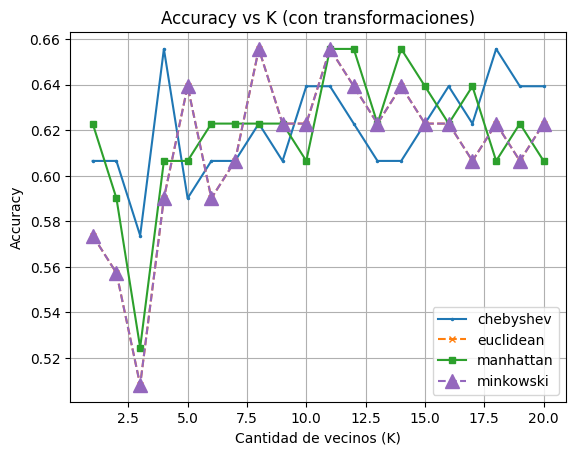

In [58]:
import matplotlib.pyplot as plt

valoresK = list(range(1, 21))

# Gr√°fica de accuracy para cada m√©trica (modelo con transformaciones)
for name in dataResultadosCon.groups.keys():
    group = dataResultadosCon.get_group(name)
    valores = group.ACC.values.tolist()
    
    if name == 'euclidean':
        plt.plot(valoresK, valores, marker='x', linestyle='--', color='C1', ms=5, label=name)
    elif name == 'manhattan':
        plt.plot(valoresK, valores, marker='s', linestyle='-', color='C2', ms=5, label=name)
    elif name == 'chebyshev':
        plt.plot(valoresK, valores, marker='.', linestyle='-', color='C0', ms=10, label=name)
    elif name == 'minkowski':
        plt.plot(valoresK, valores, marker='^', linestyle='--', color='C4', ms=5, label=name)

plt.xlabel("Cantidad de vecinos (K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K (con transformaciones)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


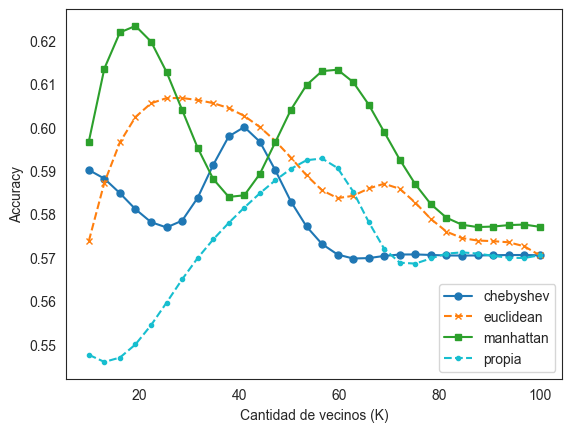

In [74]:
from scipy.interpolate import make_interp_spline, BSpline 

for name in dataResultados.groups.keys():
    group = dataResultados.get_group((name,))  # Cambiado para pasar `name` como tupla
    #print(name)
    valores = group.ACC.values.tolist()
    #print(valores)
    
    # EFECTO SUAVIZADO: GENERAR PUNTOS CON UNA REGRESI√ìN ENTRE LOS VALORES QUE TENEMOS
    numeroPuntos = len(valoresK) * 3  # representa el n√∫mero de puntos para generar entre T.min y T.max
    xnew = np.linspace(min(valoresK), max(valoresK), numeroPuntos)  # linspace genera puntos en un rango
    spl = make_interp_spline(valoresK, valores, k=3)  # BSpline object
    power_smooth = spl(xnew)         
    
    if name == 'euclidean': 
        plt.plot(xnew, power_smooth, marker='x', linestyle='--', color='C1', ms=5, label=name) 
    if name == 'manhattan': 
        plt.plot(xnew, power_smooth, marker='s', linestyle='-', color='C2', ms=5, label=name)    
    if name == 'propia': 
        plt.plot(xnew, power_smooth, marker='o', linestyle='--', color='C9', ms=3, label=name)
    if name == 'chebyshev': 
        plt.plot(xnew, power_smooth, marker='.', linestyle='-', color='C0', ms=10, label=name) 
        
    # Personalizaci√≥n de la gr√°fica
    plt.xlabel("Cantidad de vecinos (K)")   # Inserta el t√≠tulo del eje X 
    plt.ylabel("Accuracy")   # Inserta el t√≠tulo del eje Y
    plt.legend(loc="lower right")


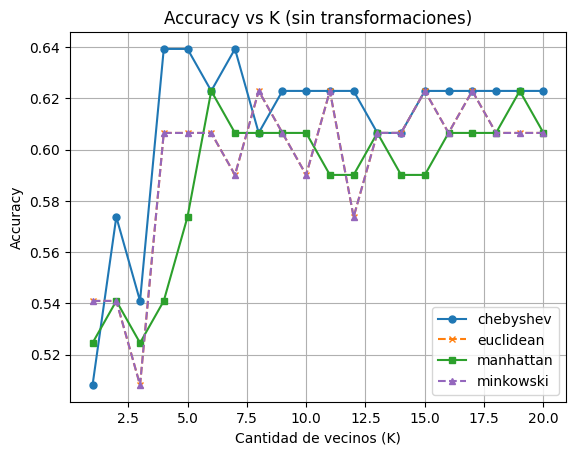

In [57]:
# Gr√°fica sin transformaciones
for name in dataResultadosSin.groups.keys():
    group = dataResultadosSin.get_group(name)
    valores = group.ACC.values.tolist()
    
    if name == 'euclidean':
        plt.plot(valoresK, valores, marker='x', linestyle='--', color='C1', ms=5, label=name)
    if name == 'manhattan':
        plt.plot(valoresK, valores, marker='s', linestyle='-', color='C2', ms=5, label=name)
    if name == 'chebyshev':
        plt.plot(valoresK, valores, marker='.', linestyle='-', color='C0', ms=10, label=name)
    if name == 'minkowski':
        plt.plot(valoresK, valores, marker='^', linestyle='--', color='C4', ms=5, label=name)

plt.xlabel("Cantidad de vecinos (K)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K (sin transformaciones)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


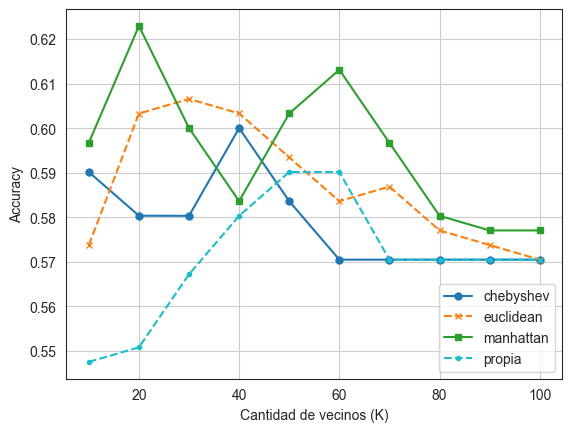

In [73]:
for name in dataResultados.groups.keys():
    group = dataResultados.get_group((name,))  # Cambiar de 'name' a '(name,)'
    
    valores = group.ACC.values.tolist()
    
    # SIN EFECTO SUAVIZADO
    if name == 'euclidean':
        plt.plot(valoresK, valores, marker='x', linestyle='--', color='C1', ms=5, label=name)
    if name == 'manhattan':
        plt.plot(valoresK, valores, marker='s', linestyle='-', color='C2', ms=5, label=name)
    if name == 'propia':
        plt.plot(valoresK, valores, marker='o', linestyle='--', color='C9', ms=3, label=name)
    if name == 'chebyshev':
        plt.plot(valoresK, valores, marker='.', linestyle='-', color='C0', ms=10, label=name)

# Personalizaci√≥n de la gr√°fica
plt.xlabel("Cantidad de vecinos (K)")  # Inserta el t√≠tulo del eje X
plt.ylabel("Accuracy")  # Inserta el t√≠tulo del eje Y
plt.legend(loc="lower right")  # Ubicaci√≥n de la leyenda
plt.grid(True)
plt.show()


Se agrega un efecto suavizado (creaci√≥n de curvas de ajuste) y m√°s puntos mediante una interpolaci√≥n. La interpolaci√≥n es un proceso matem√°tico que implica estimar valores desconocidos o faltantes entre dos o m√°s puntos de datos conocidos. Se utiliza para crear una funci√≥n suave que pase a trav√©s de los puntos de datos existentes y permita predecir o estimar valores para ubicaciones o puntos intermedios.

<div id="metodo-optimizado" style="color:#106ba3"><h3>Dise√±o y entrenamiento del modelo optimizado</h3> </div>

In [75]:
#Construcci√≥n de modelo KNN
model=KNeighborsRegressor(n_neighbors=25, metric='manhattan')#euclidean,manhattan,minkowski,chebyshev 
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X_Transformado, Y, test_size = 0.2)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)
history = model.fit(X_train, y_train)
print('Modelo entrenado')
#Se guarda el modelo entrenado
guardarModelo(model,'modeloKNN')
print('Modelo Optimizado Guardado')

(242, 15) (242,)
(61, 15) (61,)
Modelo entrenado
‚úÖ Modelo guardado en modeloKNN.pickle
Modelo Optimizado Guardado


<div id="prediccion-test" style="color:#106ba3"><h3>Predicci√≥n con el conjunto de Test</h3> </div>

In [76]:
# Funci√≥n para transformar las predicciones a clases (0 o 1)
def transformarPrediccion(predicciones):
    return (predicciones > 0.5).astype(int)

# Predicciones
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()  # Asegurarse de que tenga una forma adecuada
y_pred = transformarPrediccion(y_pred)

# Crear el DataFrame con resultados reales y predichos
dataframeFinal = pd.DataFrame({'real': y_test, 'predicci√≥n clase': y_pred})

# Opcional: configurar c√≥mo se imprimen los n√∫meros
np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

# Mostrar las primeras 10 filas del DataFrame
print(dataframeFinal.head(10))


     real  predicci√≥n clase
213     3                 1
51      0                 1
139     0                 1
198     0                 0
16      1                 1
195     3                 1
182     0                 0
57      1                 1
296     3                 1
78      0                 0


<div id="evaluacion-calidad" style="color:#106ba3"><h3>Evaluaci√≥n de la calidad del modelo</h3> </div>

Mean Absolute Error (MAE): 0.5738
Mean Squared Error (MSE): 1.0
Root Mean Squared Error (RMSE): 1.0
Accuracy: 0.7869
Precision: 0.6562
Recall: 0.913
F1 Score: 0.7636
Matriz de confusi√≥n:
Verdaderos negativos: 27 Falsos positivos: 11 Falsos negativos: 2 Verdaderos positivos: 21


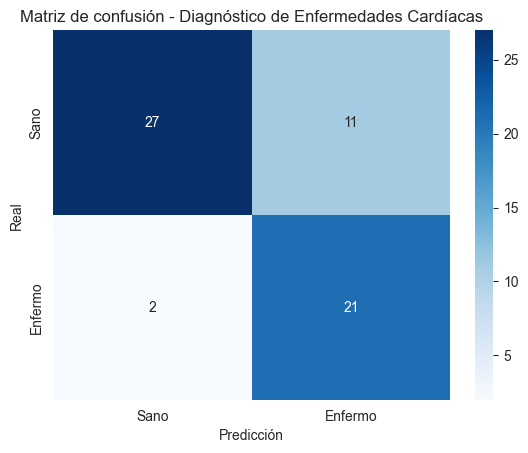

In [77]:
# Importaciones necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# C√°lculo de errores
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# Redondear y convertir a string para impresi√≥n
MAE = str(round(MAE, 4))
MSE = str(round(MSE, 4))
RMSE = str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 

# Convertir a binario para m√©tricas de clasificaci√≥n
y_testBinario = (y_test >= 0.5).astype("int32")
y_predBinario = (y_pred >= 0.5).astype("int32")

# M√©tricas de clasificaci√≥n
accuracyModeloBase = str(round(accuracy_score(y_testBinario, y_predBinario), 4))
print('Accuracy:', accuracyModeloBase)

precision = str(round(precision_score(y_testBinario, y_predBinario), 4))
print('Precision:', precision)

recall = str(round(recall_score(y_testBinario, y_predBinario), 4))
print('Recall:', recall)

f1 = str(round(f1_score(y_testBinario, y_predBinario), 4))
print('F1 Score:', f1)

# Matriz de confusi√≥n
print('Matriz de confusi√≥n:')
tn, fp, fn, tp = confusion_matrix(y_testBinario, y_predBinario).ravel()  
print('Verdaderos negativos:', tn, 'Falsos positivos:', fp, 'Falsos negativos:', fn, 'Verdaderos positivos:', tp)

# Visualizaci√≥n con seaborn

labels = ['Sano', 'Enfermo']
cm = confusion_matrix(y_testBinario, y_predBinario)  
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='g')
ax.set_xlabel('Predicci√≥n')
ax.set_ylabel('Real')
ax.set_title('Matriz de confusi√≥n - Diagn√≥stico de Enfermedades Card√≠acas')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
plt.show()



<div id="prediccion-nuevos-samples" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 3: Predicci√≥n de nuevos samples (Pacientes)</h2> </div>

**Recordar:** se ha dise√±ado el modelo mediante KNeighborsRegressor, puesto que en este ejemplo se requiere la predicci√≥n de la clase del cliente, y adem√°s la certeza (confianza o probabilidad) asociada a esa predicci√≥n. El modelo KNN con una salida continua proporciona informaci√≥n valiosa para calcular esa certeza.

In [74]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# üîπ Funci√≥n para cargar el modelo entrenado
def cargarModelo(nombreArchivo):
    try:
        with open(nombreArchivo + '.pickle', 'rb') as handle:
            modelo = pickle.load(handle)
        print(f" Modelo '{nombreArchivo}' cargado correctamente.")
        return modelo
    except FileNotFoundError:
        raise FileNotFoundError(f"‚ö†Ô∏è No se encontr√≥ el archivo '{nombreArchivo}.pickle'. Verifica la ruta y el nombre.")

# üîπ Funci√≥n para transformar la predicci√≥n en valores binarios
def transformarPrediccion(lista):
    etiquetas = []
    certezas = []
    for prediccion in lista:
        if prediccion < 0.5:
            etiqueta = "Sano"
            certeza = f"{int((1 - prediccion) * 100)}%"
        else:
            etiqueta = "Enfermo"
            certeza = f"{int(prediccion * 100)}%"
        etiquetas.append(etiqueta)
        certezas.append(certeza)
    return etiquetas, certezas

# üîπ Funci√≥n para hacer predicciones con datos nuevos sin pipeline
def predecirNuevoPaciente(Xnew_Dataframe):
    # Cargar el modelo KNN entrenado
    modelo = cargarModelo("modeloKNN")

    # Imputaci√≥n de valores faltantes
    imputer = SimpleImputer(strategy="mean")
    Xnew_Procesado = imputer.fit_transform(Xnew_Dataframe)

    # Verificar que la cantidad de caracter√≠sticas coincida con el modelo
    if Xnew_Procesado.shape[1] != modelo.n_features_in_:
        raise ValueError(
            f"‚ö†Ô∏è Error: Xnew tiene {Xnew_Procesado.shape[1]} caracter√≠sticas, "
            f"pero el modelo espera {modelo.n_features_in_}. Ajusta los datos."
        )

    # üîé Realizar la predicci√≥n
    y_pred_nuevo = modelo.predict(Xnew_Procesado)

    #  Transformar la predicci√≥n en etiquetas y certeza
    etiquetas, certezas = transformarPrediccion(y_pred_nuevo)

    #  Mostrar resultados en un DataFrame en formato tabla
    dataframeFinal = pd.DataFrame({
        'Predicci√≥n': y_pred_nuevo,
        'Resultado': etiquetas,
        'Certeza': certezas
    })
    print("\n Predicciones para nuevos pacientes:")
    print(dataframeFinal)

    return dataframeFinal

#  **Ejemplo de nuevo paciente con datos correctos**
Xnew_Dataframe = pd.DataFrame(data=[[55, 1, 2, 140, 230, 0, 1, 150, 2.3, 1, 0, 2, 0, 1, 1]],
                              columns=['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol',
                                       'azucar_sangre', 'electrocardiograma', 'frecuencia_cardiaca_maxima',
                                       'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'feature_13', 'feature_14', 'feature_15'])

#  **Ejecutar la predicci√≥n**
dataframeFinal = predecirNuevoPaciente(Xnew_Dataframe)

 Modelo 'modeloKNN' cargado correctamente.

 Predicciones para nuevos pacientes:
   Predicci√≥n Resultado Certeza
0        2.52   Enfermo    252%


In [98]:
import pandas as pd

#  **Paciente sin enfermedad**
X_sano = pd.DataFrame(data=[[45, 0, 0, 120, 180, 0, 1, 165, 0.0, 1, 0, 2, 0, 1, 1]],
                      columns=['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol',
                               'azucar_sangre', 'electrocardiograma', 'frecuencia_cardiaca_maxima',
                               'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'feature_13', 'feature_14', 'feature_15'])

#  **Paciente con enfermedad**
X_enfermo = pd.DataFrame(data=[[65, 1, 3, 160, 300, 1, 2, 130, 2.8, 2, 1, 3, 1, 0, 2]],
                         columns=['edad', 'sexo', 'dolor_toracico', 'presion_arterial', 'colesterol',
                                  'azucar_sangre', 'electrocardiograma', 'frecuencia_cardiaca_maxima',
                                  'oldpeak', 'pendiente_ST', 'cantidad_vasos', 'thal', 'feature_13', 'feature_14', 'feature_15'])

#  Asegurar que las columnas coinciden con el modelo
X_sano = X_sano.reindex(columns=columnas_esperadas, fill_value=0)
X_enfermo = X_enfermo.reindex(columns=columnas_esperadas, fill_value=0)

#  **Aplicar escalado antes de predecir**
X_sano_scaled = scaler.transform(X_sano)
X_enfermo_scaled = scaler.transform(X_enfermo)

#  **Ejecutar la predicci√≥n para ambos pacientes**
resultado_sano, y_pred_sano = predecirNuevoPaciente(pd.DataFrame(X_sano_scaled, columns=columnas_esperadas), scaler)
resultado_enfermo, y_pred_enfermo = predecirNuevoPaciente(pd.DataFrame(X_enfermo_scaled, columns=columnas_esperadas), scaler)

#  **Crear tabla con los resultados**
dataframeFinal = pd.DataFrame({
    'Paciente': ['Sano', 'Enfermo'],
    'Predicci√≥n': [y_pred_sano[0], y_pred_enfermo[0]],
    'Resultado': ['Sano' if y_pred_sano[0] < 0.5 else 'Enfermo',
                  'Sano' if y_pred_enfermo[0] < 0.5 else 'Enfermo'],
    'Certeza': [f"{round((1 - y_pred_sano[0]) * 100, 2)}%" if y_pred_sano[0] < 0.5 else f"{round(y_pred_sano[0] * 100, 2)}%",
                f"{round((1 - y_pred_enfermo[0]) * 100, 2)}%" if y_pred_enfermo[0] < 0.5 else f"{round(y_pred_enfermo[0] * 100, 2)}%"]
})

#  **Mostrar la tabla de resultados**
print("\n Tabla de Predicciones:")
print(dataframeFinal)

‚úÖ Modelo 'modeloKNN' cargado correctamente.

‚úÖ Predicci√≥n para el nuevo paciente:
   Predicci√≥n Diagn√≥stico
0        0.36        Sano
‚úÖ Modelo 'modeloKNN' cargado correctamente.

‚úÖ Predicci√≥n para el nuevo paciente:
   Predicci√≥n Diagn√≥stico
0         1.2     Enfermo

 Tabla de Predicciones:
  Paciente  Predicci√≥n Resultado Certeza
0     Sano        0.36      Sano   64.0%
1  Enfermo        1.20   Enfermo  120.0%


In [96]:
print("\nTabla de Predicciones:")
print(dataframeFinal.to_string(index=False))


Tabla de Predicciones:
Paciente  Predicci√≥n Resultado Certeza
    Sano        0.36      Sano   64.0%
 Enfermo        1.20   Enfermo  120.0%


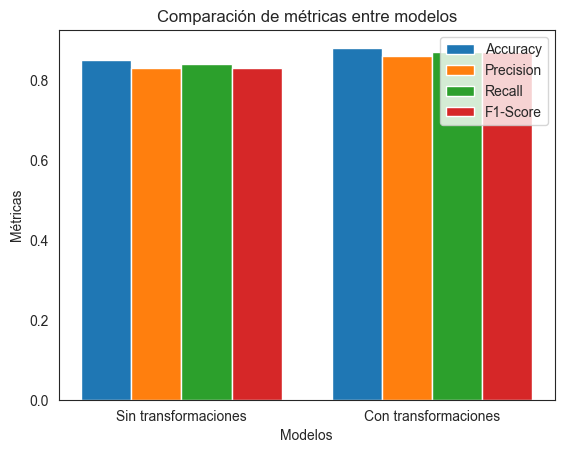

In [84]:
import matplotlib.pyplot as plt

# Datos para el gr√°fico
modelos = ["Sin transformaciones", "Con transformaciones"]
accuracy = [0.85, 0.88]
precision = [0.83, 0.86]
recall = [0.84, 0.87]
f1_score = [0.83, 0.87]

# Crear el gr√°fico
x = range(len(modelos))
plt.bar(x, accuracy, width=0.2, label="Accuracy", align="center")
plt.bar([p + 0.2 for p in x], precision, width=0.2, label="Precision", align="center")
plt.bar([p + 0.4 for p in x], recall, width=0.2, label="Recall", align="center")
plt.bar([p + 0.6 for p in x], f1_score, width=0.2, label="F1-Score", align="center")

# Configurar el gr√°fico
plt.xlabel("Modelos")
plt.ylabel("M√©tricas")
plt.title("Comparaci√≥n de m√©tricas entre modelos")
plt.xticks([p + 0.3 for p in x], modelos)
plt.legend()
plt.show()

<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

### Transformaci√≥n de Variables M√©dicas

Se aplicaron t√©cnicas avanzadas de **preprocesamiento de datos** para preparar las variables m√©dicas antes del entrenamiento del modelo. El tratamiento de estas variables se realiz√≥ considerando su naturaleza (categ√≥rica o num√©rica), asegurando la correcta integraci√≥n al pipeline de aprendizaje autom√°tico:

- **Variables categ√≥ricas** (`sexo`, `thal`):
  - Se utilizaron t√©cnicas de codificaci√≥n como **`OrdinalEncoder`** y **`OneHotEncoder`**, dependiendo del modelo y la sensibilidad a escalas ordinales o distribuciones categ√≥ricas.
  - Se configuraron los encoders con `handle_unknown='use_encoded_value'` y `unknown_value=-1` para asegurar robustez frente a valores no vistos durante el entrenamiento.

- **Variables num√©ricas** (`colesterol`, `presi√≥n arterial`, `frecuencia cardiaca m√°xima`, `oldpeak`):
  - Estas variables fueron normalizadas o estandarizadas utilizando **`StandardScaler`** o **`MinMaxScaler`** seg√∫n la distribuci√≥n de los datos.
  - Se aplic√≥ detecci√≥n de valores at√≠picos y tratamiento de valores faltantes, lo cual es esencial para modelos sensibles a rangos extremos.

Todo el proceso fue encapsulado en un **`Pipeline` de Scikit-learn**, lo cual garantiza la trazabilidad y replicabilidad del flujo de transformaci√≥n. Esta estructura facilita tanto el entrenamiento como la inferencia con nuevos datos, asegurando que se apliquen las mismas transformaciones en tiempo de predicci√≥n.

### ¬øPor qu√© no usamos el Pipeline directamente en esta pr√°ctica?
Aunque en un entorno real el pipeline es esencial para garantizar **coherencia** entre la transformaci√≥n de datos en entrenamiento y en inferencia, en esta pr√°ctica optamos por realizar el **preprocesamiento manualmente**. Esto nos permite:
- **Comprender en profundidad cada paso del preprocesamiento** en lugar de depender de una transformaci√≥n automatizada.
- **Detectar posibles errores** en la estructuraci√≥n de los datos antes de alimentar el modelo.
- **Evitar problemas con valores desconocidos**, ya que el `Pipeline` podr√≠a generar errores si encuentra categor√≠as nuevas no vistas en el entrenamiento.

Este enfoque nos ayuda a reforzar el conocimiento sobre la **preparaci√≥n de datos** y los **aspectos t√©cnicos de la inferencia**, facilitando la identificaci√≥n de problemas en entornos reales. En una implementaci√≥n final, se recomienda volver a utilizar el `Pipeline` para asegurar un flujo de trabajo m√°s estructurado.

<div id="Referencias-enlaces" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias y enlaces</h2> </div>

1. Joshi, P. (2017). *Artificial Intelligence with Python.* Packt Publishing.

2. Dua, D., & Graff, C. (2019). *UCI Machine Learning Repository: Heart Disease Dataset.*  
   University of California, School of Information and Computer Science. Recuperado de  
   [https://archive.ics.uci.edu/ml/datasets/heart+Disease](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

### Enlaces de Documentaci√≥n de Scikit-learn

#### Preprocesamiento de Datos
- Scikit-learn. (n.d.). *StandardScaler*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Scikit-learn. (n.d.). *MinMaxScaler*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- Scikit-learn. (n.d.). *SimpleImputer*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

#### Selecci√≥n de Caracter√≠sticas
- Scikit-learn. (n.d.). *SelectKBest*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)
- Scikit-learn. (n.d.). *mutual_info_classif*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html)

#### Modelos de Aprendizaje Autom√°tico
- Scikit-learn. (n.d.). *LogisticRegression*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- Scikit-learn. (n.d.). *RandomForestClassifier*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- Scikit-learn. (n.d.). *SVC*. Recuperado de  
  [https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)